<a href="https://colab.research.google.com/github/olivia-sp/h2-station-dev/blob/main/station_model_total_v0_8_olivia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ver0.1 - EDA
#ver0.2 - EDA 업데이트 및 모델 개선


# EDA

In [1]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
import os

if os.path.isfile('/content/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv') == True:
  print('already')
else:
  #os.mkdir('data_set')
  %cd data_set
  !wget https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv

% cd /content


[Errno 2] No such file or directory: 'data_set'
/content
--2022-03-26 06:30:47--  https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-03-26 06:30:47 ERROR 404: Not Found.

/content


In [3]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
#DATA_PATH = os.path.join(CURR_PATH,'data_set')
RAW_PATH = CURR_PATH + '/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv'



In [4]:
df_raw_data = pd.read_csv(RAW_PATH, index_col=0)
df_raw_data.info()

df_raw_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77436
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  bool   
 1   weekend             77222 non-null  bool   
 2   time                77222 non-null  object 
 3   precipitation_type  46123 non-null  float64
 4   temperature         46123 non-null  float64
 5   station_name        77222 non-null  int64  
 6   filename            77222 non-null  object 
 7   precipitation       46123 non-null  float64
 8   total_car_num       77222 non-null  int64  
 9   day_week            77222 non-null  object 
 10  decision_car_num    76980 non-null  object 
 11  humid               46123 non-null  float64
 12  max_car_num         76907 non-null  float64
 13  year                77222 non-null  int64  
 14  month               77222 non-null  int64  
 15  day                 77222 non-null  int64  
 16  hour

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
filename                  0
precipitation         31099
total_car_num             0
day_week                  0
decision_car_num        242
humid                 31099
max_car_num             315
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [5]:
df_raw_data = df_raw_data.reset_index()

In [6]:
df_raw_data2=df_raw_data.drop(['decision_car_num', 'max_car_num', 'filename', 'index'], axis=1)
df_raw_data2.isnull().sum()

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
precipitation         31099
total_car_num             0
day_week                  0
humid                 31099
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [7]:
df_raw_data2

,holiday,weekend,time,precipitation_type,temperature,station_name,precipitation,total_car_num,day_week,humid,year,month,day,hour,minute,second
0,False,False,2020-09-17-21h-20m-28s,0.0,23.0,26,0.0,2,thu,52.0,2020,9,17,21,20,28
1,False,False,2020-09-17-21h-38m-08s,0.0,23.0,26,0.0,3,thu,52.0,2020,9,17,21,38,8
2,False,False,2020-09-18-16h-45m-41s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,45,41
3,False,False,2020-09-18-16h-50m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,50,0
4,False,False,2020-09-18-16h-55m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,False,False,2022-01-06-16h-40m-00s,NaN,NaN,26,NaN,3,thu,NaN,2022,1,6,16,40,0
77218,False,False,2022-01-06-16h-45m-00s,NaN,NaN,26,NaN,3,thu,NaN,2022,1,6,16,45,0
77219,False,False,2022-01-06-16h-50m-00s,NaN,NaN,26,NaN,4,thu,NaN,2022,1,6,16,50,0
77220,False,False,2022-01-06-16h-55m-00s,NaN,NaN,26,NaN,2,thu,NaN,2022,1,6,16,55,0


Holiday 처리

In [ ]:
!pip install holidays

In [ ]:
# Holiday Data 추가   
import holidays

time_df = pd.DataFrame(df_raw_data2['time'])
time_df['time'] = pd.to_datetime(time_df['time'], format='%Y-%m-%d-%Hh-%Mm-%Ss', errors='raise')
time_df['date'] = time_df['time'].dt.date

holiday_list = time_df['date']


Year 끝 두자리로 변환

In [ ]:
#Year 끝 2자리 사용
time_df['year'] = time_df['time'].dt.strftime("%y")
time_df['year']
# time_df['year'] = time_df['time2'].dt.year

0        20
1        20
2        20
3        20
4        20
         ..
77217    22
77218    22
77219    22
77220    22
77221    22
Name: year, Length: 77222, dtype: object

In [ ]:
# 한국 휴일 개체 생성
kr_holidays = holidays.KR()

# generate holiday table 
holiday_df = pd.DataFrame(columns=['ds', 'imp_holiday'])
holiday_df['ds'] = holiday_list
holiday_df['imp_holiday'] = holiday_df.ds.apply(lambda x: 'True' if x in kr_holidays else 'False')

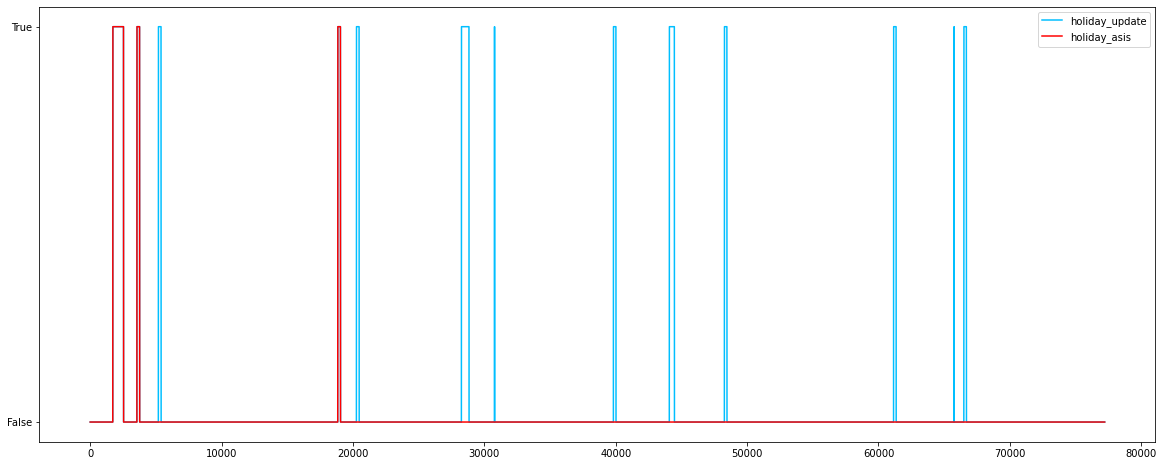

In [ ]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)


chart.plot(holiday_df['imp_holiday'], color='deepskyblue' , label='holiday_update')
chart.plot(df_raw_data2['holiday'], color='red' , label='holiday_asis')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'best')

In [ ]:
df_raw_data2['year'] = time_df['year'].astype(int)
df_raw_data2['holiday'] = holiday_df['imp_holiday']

Season 데이터 생성

In [ ]:
def SeasonData(month):
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    elif month in [9,10,11]:
        return 'autumn'

df_raw_data2['season'] = df_raw_data2.month.apply(SeasonData)

Hour_group 데이터 생성
- Dawn 0시~7시
- Morning 7시~12시
- Lunch 12시~13시
- Day 13시~18시
- Dinner 18시~19시
- Night 19시~0시

In [ ]:
def HourGroupData(hour):
    if hour in [1,2,3,4,5,6]:
        return 'dawn'
    elif hour in [7,8,9,10,11]:
        return 'morning'
    elif hour in [12]:
        return 'lunch'
    elif hour in [13,14,15,16,17]:
        return 'afternoon'
    elif hour in [18]:
      return 'dinner'
    elif hour in [19, 20, 21, 22, 23, 0]:
      return 'night'

df_raw_data2['hour_group'] = df_raw_data2.hour.apply(HourGroupData)

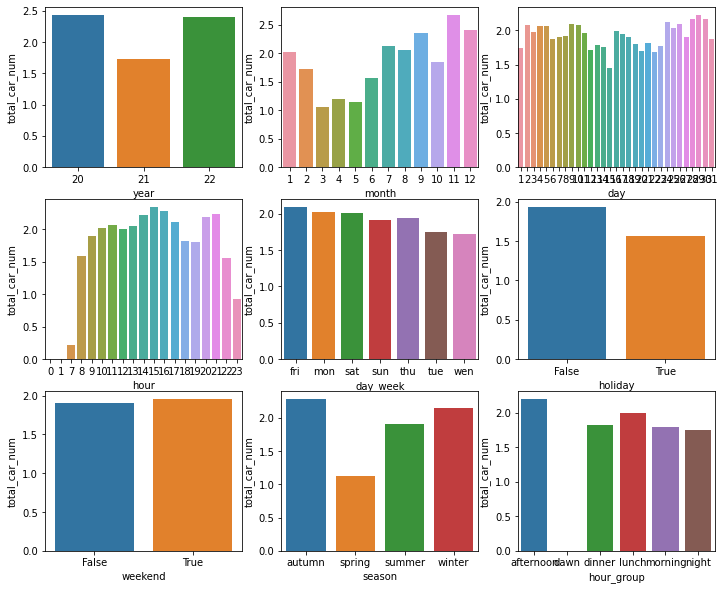

In [ ]:
#year와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.barplot(x='year',y='total_car_num',data=df_raw_data2.groupby('year')['total_car_num'].mean().reset_index())

#month와 count
ax2 = fig.add_subplot(3,3,2)
ax2 = sns.barplot(x='month',y='total_car_num',data=df_raw_data2.groupby('month')['total_car_num'].mean().reset_index())

#day와 count
ax3 = fig.add_subplot(3,3,3)
ax3 = sns.barplot(x='day',y='total_car_num',data=df_raw_data2.groupby('day')['total_car_num'].mean().reset_index())

#hour와 count
ax4 = fig.add_subplot(3,3,4)
ax4 = sns.barplot(x='hour',y='total_car_num',data=df_raw_data2.groupby('hour')['total_car_num'].mean().reset_index())

#day_week과 count
ax5 = fig.add_subplot(3,3,5)
ax5 = sns.barplot(x='day_week',y='total_car_num',data=df_raw_data2.groupby('day_week')['total_car_num'].mean().reset_index())

#holiday와 count
ax6 = fig.add_subplot(3,3,6)
ax6 = sns.barplot(x='holiday',y='total_car_num',data=df_raw_data2.groupby('holiday')['total_car_num'].mean().reset_index())

#weekend와 count
ax7 = fig.add_subplot(3,3,7)
ax7 = sns.barplot(x='weekend',y='total_car_num',data=df_raw_data2.groupby('weekend')['total_car_num'].mean().reset_index())

#season과 count
ax8 = fig.add_subplot(3,3,8)
ax8 = sns.barplot(x='season',y='total_car_num',data=df_raw_data2.groupby('season')['total_car_num'].mean().reset_index())

#hour_group과 count
ax9 = fig.add_subplot(3,3,9)
ax9 = sns.barplot(x='hour_group',y='total_car_num',data=df_raw_data2.groupby('hour_group')['total_car_num'].mean().reset_index())

In [ ]:
# sns.pairplot(df_raw_data2, height=5);
# plt.show()

In [ ]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data = df_raw_data2.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
df_raw_data2.drop(df_raw_data.loc[df_raw_data['total_car_num'] == 6].index, inplace =True)
df_raw_data2.info()

df_raw_data2.drop('time', axis=1, inplace = True)
df_raw_data2.info()

# df_raw_data2['day_week'].replace('mon', 0, inplace = True)
# df_raw_data2['day_week'].replace('tue', 1, inplace = True)
# df_raw_data2['day_week'].replace('wen', 2, inplace = True)
# df_raw_data2['day_week'].replace('thu', 3, inplace = True)
# df_raw_data2['day_week'].replace('fri', 4, inplace = True)
# df_raw_data2['day_week'].replace('sat', 5, inplace = True)
# df_raw_data2['day_week'].replace('sun', 6, inplace = True)

df_raw_data2['holiday'] = df_raw_data['holiday'].astype(int)
df_raw_data2['weekend'] = df_raw_data['weekend'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  object 
 1   weekend             77222 non-null  bool   
 2   time                77222 non-null  object 
 3   precipitation_type  46123 non-null  float64
 4   temperature         46123 non-null  float64
 5   station_name        77222 non-null  int64  
 6   precipitation       46123 non-null  float64
 7   total_car_num       77222 non-null  int64  
 8   day_week            77222 non-null  object 
 9   humid               46123 non-null  float64
 10  year                77222 non-null  int64  
 11  month               77222 non-null  int64  
 12  day                 77222 non-null  int64  
 13  hour                77222 non-null  int64  
 14  minute              77222 non-null  int64  
 15  second              77222 non-null  int64  
 16  seas

In [ ]:
day_week_dum = pd.get_dummies(df_raw_data2['day_week'])
# df_raw_data3 + day_week_dum
df_dum1 = df_raw_data2.join(day_week_dum,how='left')

In [ ]:
season_dum = pd.get_dummies(df_dum1['season'])
# df_raw_data3 + day_week_dum
df_dum2 = df_dum1.join(season_dum,how='left')

In [ ]:
hrgroup_dum = pd.get_dummies(df_dum2['hour_group'])
# df_raw_data3 + day_week_dum
df_dum3 = df_dum2.join(hrgroup_dum,how='left')

In [ ]:
df_raw_data3=df_dum3.drop(['day_week', 'season', 'hour_group'], axis=1)
df_raw_data3

,holiday,weekend,precipitation_type,temperature,station_name,precipitation,total_car_num,humid,year,month,day,hour,minute,second,fri,mon,sat,sun,thu,tue,wen,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0,0,0.0,23.0,26,0.0,2,52.0,20,9,17,21,20,28,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0.0,23.0,26,0.0,3,52.0,20,9,17,21,38,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,45,41,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,50,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,55,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0,0,NaN,NaN,26,NaN,3,NaN,22,1,6,16,40,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77218,0,0,NaN,NaN,26,NaN,3,NaN,22,1,6,16,45,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77219,0,0,NaN,NaN,26,NaN,4,NaN,22,1,6,16,50,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77220,0,0,NaN,NaN,26,NaN,2,NaN,22,1,6,16,55,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [ ]:
#df_raw_data3.describe()

In [ ]:
df_raw_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  int64  
 1   weekend             77222 non-null  int64  
 2   precipitation_type  46123 non-null  float64
 3   temperature         46123 non-null  float64
 4   station_name        77222 non-null  int64  
 5   precipitation       46123 non-null  float64
 6   total_car_num       77222 non-null  int64  
 7   humid               46123 non-null  float64
 8   year                77222 non-null  int64  
 9   month               77222 non-null  int64  
 10  day                 77222 non-null  int64  
 11  hour                77222 non-null  int64  
 12  minute              77222 non-null  int64  
 13  second              77222 non-null  int64  
 14  fri                 77222 non-null  uint8  
 15  mon                 77222 non-null  uint8  
 16  sat 

결측값 처리

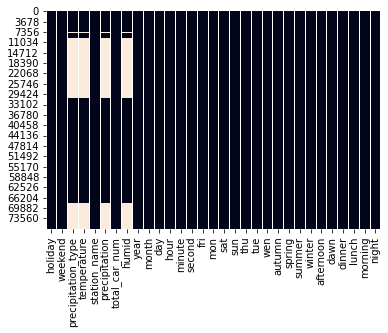

In [ ]:
%matplotlib inline
sns.heatmap(df_raw_data3.isnull(), cbar=False)

Data Imputation
1. mean/median : 작은 크기의 숫자형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 범주형 feature 사용 불가, 부정확함
2. most frequent/zero/constant : 범주형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 데이터 bias 생성 가능
3. KNN imputation : feature similarity  이용하여 근접한 데이터 찾음(impyute lib), 데이터셋에 따라 다르나 가장 정확함, 메모리 많이 필요, outlier에 민감
4. MICE : 누락된 데이터 여러번 채우는 방식, 연속형/이진형/범위형 패턴 처리 가능, imputation-analysis(m개의 완성된 데이터 분석)-pooling(평균,분산,신뢰구간 계산하여 합침)
5. 딥러닝 이용 : 범주형/non-numerical 데이터에 매우 효과적, DNN 이용해서 누락 값 유추, 한번에 한 컬럼만 대체 가능, 대규모 데이터셋은 속도가 상당히 느림, 유추할 feature에 대한 정보있는 feature 직접 지정해야 함
6. stochastic regression imputation : 동일 데이터셋의 다른 feature에서 결측값 예측
7. Extrapolation and Interpolation : 이산형 범위 내 데이터로부터 값 추정, interpolation(20살, 40살 데이터로 30살 추측), Extrapolation(1~20 데이터로 10년 후 예측, 안정성 떨어짐)
8. Hot-Deck Imputation : 비슷한 데이터셋에서 랜덤하게 선택


In [ ]:
df_null = df_raw_data3[['precipitation','precipitation_type', 'temperature', 'humid']]
df_raw_data4 = df_raw_data3.drop(['precipitation','precipitation_type', 'temperature', 'humid'], axis=1)
df_raw_data4

,holiday,weekend,station_name,total_car_num,year,month,day,hour,minute,second,fri,mon,sat,sun,thu,tue,wen,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0,0,26,2,20,9,17,21,20,28,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,26,3,20,9,17,21,38,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,26,4,20,9,18,16,45,41,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,26,4,20,9,18,16,50,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,26,4,20,9,18,16,55,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0,0,26,3,22,1,6,16,40,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77218,0,0,26,3,22,1,6,16,45,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77219,0,0,26,4,22,1,6,16,50,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77220,0,0,26,2,22,1,6,16,55,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


MICE

In [ ]:
!pip3 install impyute

In [ ]:
#다른 컬럼 상관관계 파악 필요
df_null_mice = df_raw_data3

In [ ]:
#df_null_mice.info()

In [ ]:
from impyute.imputation.cs import mice
imp_mice = mice(df_null_mice.values) # mice 학습시작
df_mice = pd.DataFrame(imp_mice, columns=df_null_mice.columns)

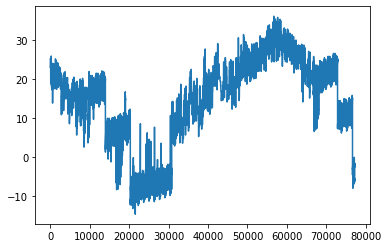

In [ ]:
df_mice['temperature'].plot()

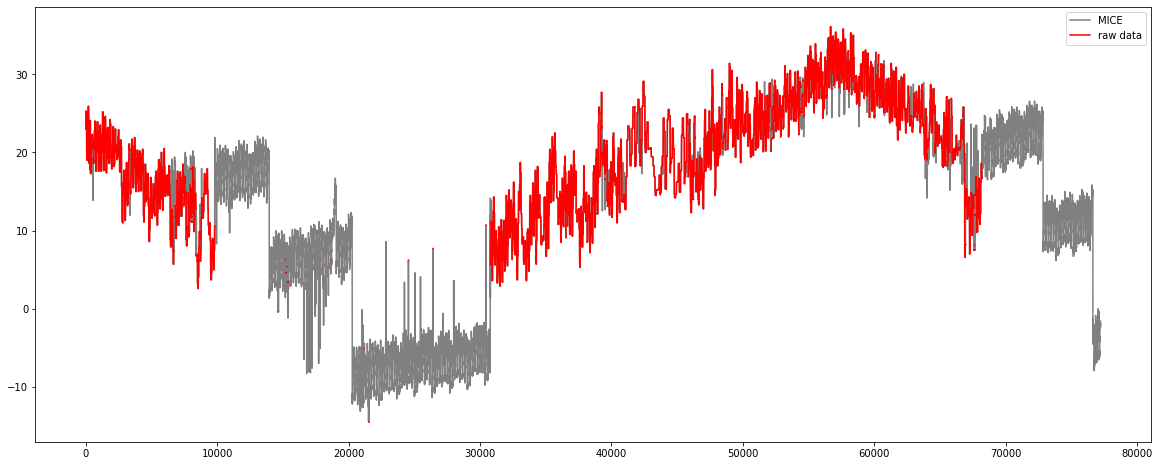

In [ ]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_mice['temperature'], color='gray' , label='MICE')
chart.plot(df_raw_data3['temperature'], color='red' , label='raw data')
plt.legend(loc = 'best')

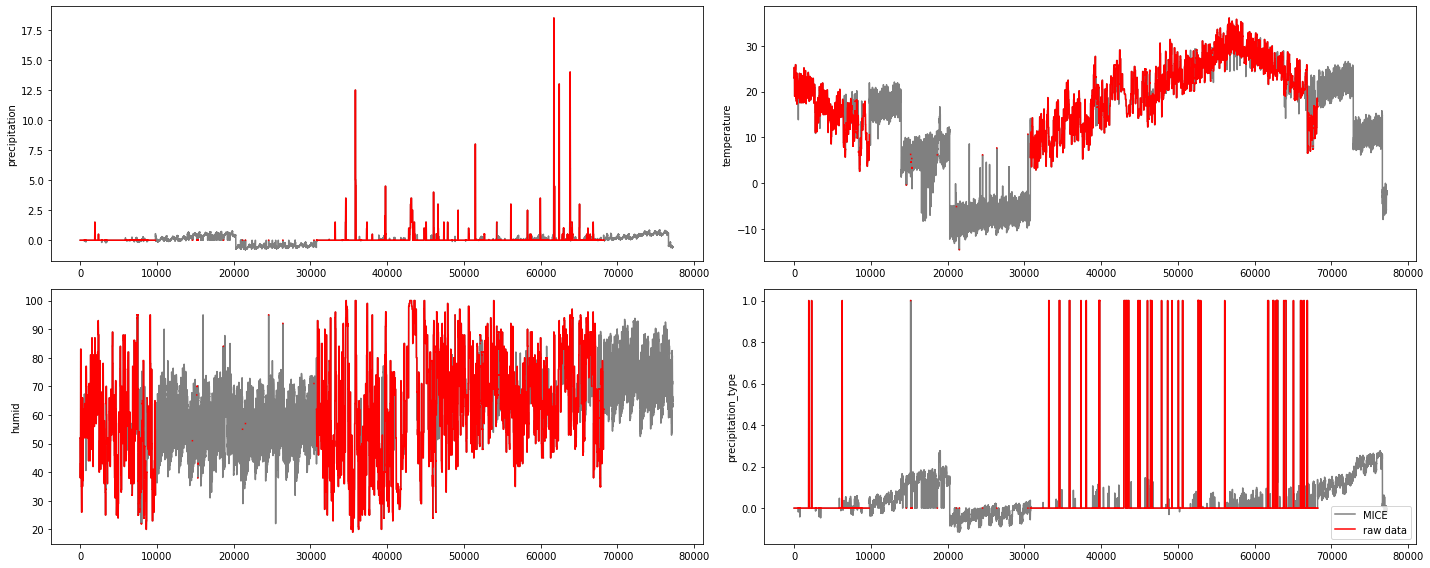

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

chart1 = plt.subplot(2,2,1)
plt.plot(df_mice['precipitation'], color='gray' , label='MICE')
plt.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.ylabel('precipitation')

chart2 = plt.subplot(2,2,2)
plt.plot(df_mice['temperature'], color='gray' , label='MICE')
plt.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.ylabel('temperature')

chart3 = plt.subplot(2,2,3)
plt.plot(df_mice['humid'], color='gray' , label='MICE')
plt.plot(df_raw_data2['humid'], color='red' , label='raw data')
plt.ylabel('humid')

chart3 = plt.subplot(2,2,4)
plt.plot(df_mice['precipitation_type'], color='gray' , label='MICE')
plt.plot(df_raw_data2['precipitation_type'], color='red' , label='raw data')
plt.ylabel('precipitation_type')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
df_mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77222 entries, 0 to 77221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  float64
 1   weekend             77222 non-null  float64
 2   precipitation_type  77222 non-null  float64
 3   temperature         77222 non-null  float64
 4   station_name        77222 non-null  float64
 5   precipitation       77222 non-null  float64
 6   total_car_num       77222 non-null  float64
 7   humid               77222 non-null  float64
 8   year                77222 non-null  float64
 9   month               77222 non-null  float64
 10  day                 77222 non-null  float64
 11  hour                77222 non-null  float64
 12  minute              77222 non-null  float64
 13  second              77222 non-null  float64
 14  fri                 77222 non-null  float64
 15  mon                 77222 non-null  float64
 16  sat 

In [8]:
CURR_PATH = os.getcwd()
CURR_PATH

'/content'

In [9]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
#DATA_PATH = os.path.join(CURR_PATH,'data_set')
SAVE_PATH = CURR_PATH + '/drive/MyDrive/Colab Notebooks/data_set/data_imputation_MICE.csv'

In [8]:
df_mice.to_csv(SAVE_PATH, index=True)

NameError: ignored

#성능평가 - MICE

In [10]:
df_mice2 = pd.read_csv(SAVE_PATH, index_col=0)
df_mice2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  float64
 1   weekend             77222 non-null  float64
 2   precipitation_type  77222 non-null  float64
 3   temperature         77222 non-null  float64
 4   station_name        77222 non-null  float64
 5   precipitation       77222 non-null  float64
 6   total_car_num       77222 non-null  float64
 7   humid               77222 non-null  float64
 8   year                77222 non-null  float64
 9   month               77222 non-null  float64
 10  day                 77222 non-null  float64
 11  hour                77222 non-null  float64
 12  minute              77222 non-null  float64
 13  second              77222 non-null  float64
 14  fri                 77222 non-null  float64
 15  mon                 77222 non-null  float64
 16  sat 

모델 적용

In [11]:
df_new1 = df_mice2
df_new1 = df_new1[['total_car_num','holiday','weekend','precipitation_type','temperature','station_name','precipitation','humid','year','month','day','hour','minute','second','fri','mon','sat','sun','thu','tue','wen','autumn','spring','summer','winter','afternoon','dawn','dinner','lunch','morning','night']]

In [12]:
df_new1

,total_car_num,holiday,weekend,precipitation_type,temperature,station_name,precipitation,humid,year,month,...,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,2.0,0.0,0.0,0.000000,23.000000,26.0,0.000000,52.000000,20.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,0.0,0.0,0.000000,23.000000,26.0,0.000000,52.000000,20.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.0,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,3.0,0.0,0.0,-0.007549,-2.072277,26.0,-0.551757,63.498700,22.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77218,3.0,0.0,0.0,-0.007764,-2.106175,26.0,-0.552482,63.465866,22.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77219,4.0,0.0,0.0,-0.015678,-1.929549,26.0,-0.557765,62.786902,22.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77220,2.0,0.0,0.0,-0.000496,-2.384493,26.0,-0.549374,64.046330,22.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
# y = y. flatten()
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size = 0.2, 
#                                                     shuffle=False,
#                                                     )
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
#                                                     test_size = 0.2, 
#                                                     shuffle=False,
#                                                     )

# print('X_train :', X_train)
# print('X_valid :', X_valid)
# print('X_test :', X_test)
# print('y_train :', y_train)
# print('y_valid :', y_valid)
# print('y_test :', y_test)

In [14]:
df_new2=df_new1.drop(['total_car_num'], axis=1)
df_new2

,holiday,weekend,precipitation_type,temperature,station_name,precipitation,humid,year,month,day,...,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0.0,0.0,0.000000,23.000000,26.0,0.000000,52.000000,20.0,9.0,17.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.000000,23.000000,26.0,0.000000,52.000000,20.0,9.0,17.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,18.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,18.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,25.300000,26.0,0.000000,38.000000,20.0,9.0,18.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0.0,0.0,-0.007549,-2.072277,26.0,-0.551757,63.498700,22.0,1.0,6.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77218,0.0,0.0,-0.007764,-2.106175,26.0,-0.552482,63.465866,22.0,1.0,6.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77219,0.0,0.0,-0.015678,-1.929549,26.0,-0.557765,62.786902,22.0,1.0,6.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77220,0.0,0.0,-0.000496,-2.384493,26.0,-0.549374,64.046330,22.0,1.0,6.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import pandas as pd
from sklearn import preprocessing

df_new2=df_new1.drop(['total_car_num'], axis=1)
scaler_x = df_new2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(scaler_x)
df_new2 = pd.DataFrame(x_scaled)


In [16]:
df_new3 = df_new2.join(df_new1[['total_car_num']],how='right')
df_new3.columns=['holiday','weekend','precipitation_type','temperature','station_name','precipitation','humid','year','month','day','hour','minute','second','fri','mon','sat','sun','thu','tue','wen','autumn','spring','summer','winter','afternoon','dawn','dinner','lunch','morning','night','total_car_num']
df_new = df_new3[['total_car_num','holiday','weekend','precipitation_type','temperature','station_name','precipitation','humid','year','month','day','hour','minute','second','fri','mon','sat','sun','thu','tue','wen','autumn','spring','summer','winter','afternoon','dawn','dinner','lunch','morning','night']]

In [17]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_train :', X_train)
print('X_valid :', X_valid)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_valid :', y_valid)
print('y_test :', y_test)

X_train : [[0.         0.         0.10566096 ... 0.         0.         1.        ]
 [0.         0.         0.10399736 ... 0.         0.         1.        ]
 [0.         0.         0.10399736 ... 0.         0.         1.        ]
 ...
 [0.         0.         0.10399736 ... 0.         1.         0.        ]
 [0.         1.         0.27210803 ... 0.         0.         1.        ]
 [0.         1.         0.13766331 ... 1.         0.         0.        ]]
X_valid : [[0.         0.         0.10399736 ... 0.         0.         1.        ]
 [0.         0.         0.10399736 ... 0.         1.         0.        ]
 [0.         0.         0.10399736 ... 0.         0.         1.        ]
 ...
 [1.         1.         0.10399736 ... 0.         0.         0.        ]
 [0.         1.         0.10399736 ... 0.         0.         0.        ]
 [0.         0.         0.10399736 ... 0.         0.         1.        ]]
X_test : [[0.         0.         0.10399736 ... 0.         0.         1.        ]
 [0.      

In [18]:
X_train_t = X_train.reshape(X_train.shape[0], 30, 1)
X_valid_t = X_valid.reshape(X_valid.shape[0], 30, 1)
X_test_t = X_test.reshape(X_test.shape[0], 30, 1)

print("최종 DATA")
print(X_train_t.shape)

최종 DATA
(61777, 30, 1)


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def confirm_result(y_test,y_pred):
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  #MSLE = mean_squared_log_error(y_test,y_pred)
  R2 = r2_score(y_test,y_pred)
  pd.options.display.float_format='{:.5f}'.format
  
  Result = pd.DataFrame(data=[MAE,RMSE,R2],index=['MAE','RMSE','R2'],columns=['Results'])
  return Result

#GRU

## GRU1,Dense1,adam

In [97]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


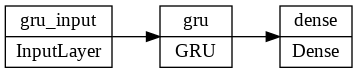

In [98]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [99]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 9s 4ms/step - loss: 2.2923 - mean_squared_error: 2.2923 - val_loss: 2.2411 - val_mean_squared_error: 2.2411
Epoch 2/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.1489 - mean_squared_error: 2.1489 - val_loss: 2.0748 - val_mean_squared_error: 2.0748
Epoch 3/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.0386 - mean_squared_error: 2.0386 - val_loss: 2.0095 - val_mean_squared_error: 2.0095
Epoch 4/100
1545/1545 [==============================] - 7s 4ms/step - loss: 1.9753 - mean_squared_error: 1.9753 - val_loss: 1.9272 - val_mean_squared_error: 1.9272
Epoch 5/100
1545/1545 [==============================] - 7s 4ms/step - loss: 1.9139 - mean_squared_error: 1.9139 - val_loss: 1.8963 - val_mean_squared_error: 1.8963
Epoch 6/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.8608 - mean_squared_error: 1.8608 - val_loss: 1.8182 - val_mean_squared_error: 1.8182
Epoch 7/10

In [100]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [101]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 1s 3ms/step - loss: 0.6022 - mean_squared_error: 0.6022
MSE =  [0.6021848320960999, 0.6021848320960999]


In [102]:
confirm_result(y_test,y_pred)

,Results
MAE,0.53907
RMSE,0.77601
R2,0.73704


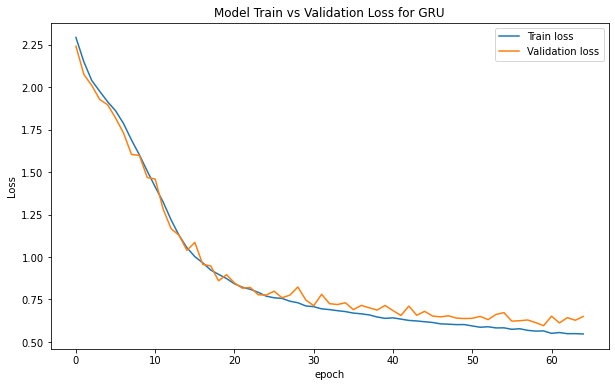

In [103]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1(256),Dense1,adam - 0.4

In [104]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               198912    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 199,169
Trainable params: 199,169
Non-trainable params: 0
_________________________________________________________________


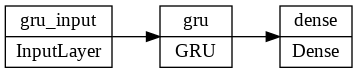

In [105]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [106]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 9s 5ms/step - loss: 2.2587 - mean_squared_error: 2.2587 - val_loss: 2.3720 - val_mean_squared_error: 2.3720
Epoch 2/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.0932 - mean_squared_error: 2.0932 - val_loss: 2.0254 - val_mean_squared_error: 2.0254
Epoch 3/100
1545/1545 [==============================] - 8s 5ms/step - loss: 1.9831 - mean_squared_error: 1.9831 - val_loss: 1.9486 - val_mean_squared_error: 1.9486
Epoch 4/100
1545/1545 [==============================] - 8s 5ms/step - loss: 1.9061 - mean_squared_error: 1.9061 - val_loss: 1.8755 - val_mean_squared_error: 1.8755
Epoch 5/100
1545/1545 [==============================] - 8s 5ms/step - loss: 1.8281 - mean_squared_error: 1.8281 - val_loss: 1.7962 - val_mean_squared_error: 1.7962
Epoch 6/100
1545/1545 [==============================] - 8s 5ms/step - loss: 1.7289 - mean_squared_error: 1.7289 - val_loss: 1.6618 - val_mean_squared_error: 1.6618
Epoch 7/10

In [107]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [108]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 1s 3ms/step - loss: 0.5788 - mean_squared_error: 0.5788
MSE =  [0.5788378715515137, 0.5788378715515137]


In [109]:
confirm_result(y_test,y_pred)

,Results
MAE,0.51461
RMSE,0.76081
R2,0.74723


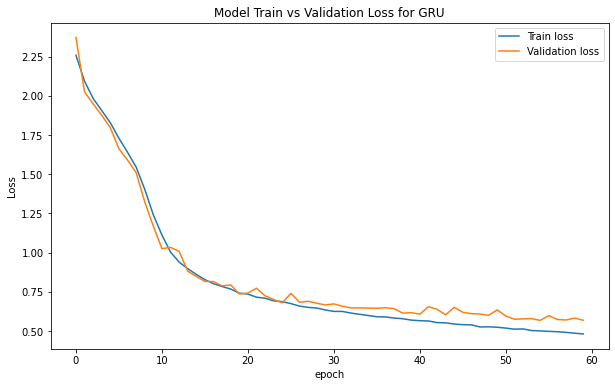

In [110]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(256,32),Dense1,adam -t

In [111]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=32))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 32)                27840     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 226,785
Trainable params: 226,785
Non-trainable params: 0
_________________________________________________________________


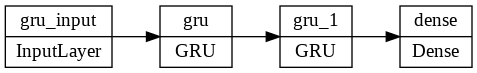

In [112]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [113]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 13s 7ms/step - loss: 2.2748 - mean_squared_error: 2.2748 - val_loss: 2.2252 - val_mean_squared_error: 2.2252
Epoch 2/100
1545/1545 [==============================] - 10s 6ms/step - loss: 2.1023 - mean_squared_error: 2.1023 - val_loss: 2.0260 - val_mean_squared_error: 2.0260
Epoch 3/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.9752 - mean_squared_error: 1.9752 - val_loss: 1.8815 - val_mean_squared_error: 1.8815
Epoch 4/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.8866 - mean_squared_error: 1.8866 - val_loss: 1.8718 - val_mean_squared_error: 1.8718
Epoch 5/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.8041 - mean_squared_error: 1.8041 - val_loss: 1.8227 - val_mean_squared_error: 1.8227
Epoch 6/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.7268 - mean_squared_error: 1.7268 - val_loss: 1.7039 - val_mean_squared_error: 1.7039
Epoch 7/

In [114]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [115]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.6121 - mean_squared_error: 0.6121
MSE =  [0.6120640635490417, 0.6120640635490417]


In [116]:
confirm_result(y_test,y_pred)

,Results
MAE,0.56222
RMSE,0.78235
R2,0.73272


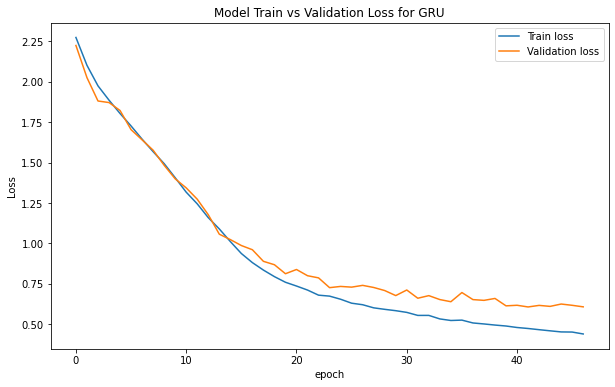

In [117]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(256,32),Dense1,RMSprop -t

In [118]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=32))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 32)                27840     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 226,785
Trainable params: 226,785
Non-trainable params: 0
_________________________________________________________________


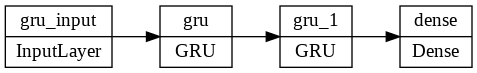

In [119]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [120]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 13s 7ms/step - loss: 2.2508 - mean_squared_error: 2.2508 - val_loss: 2.1483 - val_mean_squared_error: 2.1483
Epoch 2/100
1545/1545 [==============================] - 10s 6ms/step - loss: 2.0670 - mean_squared_error: 2.0670 - val_loss: 2.0329 - val_mean_squared_error: 2.0329
Epoch 3/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.9494 - mean_squared_error: 1.9494 - val_loss: 1.9094 - val_mean_squared_error: 1.9094
Epoch 4/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.8729 - mean_squared_error: 1.8729 - val_loss: 1.8809 - val_mean_squared_error: 1.8809
Epoch 5/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.8085 - mean_squared_error: 1.8085 - val_loss: 1.7501 - val_mean_squared_error: 1.7501
Epoch 6/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.7461 - mean_squared_error: 1.7461 - val_loss: 1.6845 - val_mean_squared_error: 1.6845
Epoc

In [121]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [122]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.6044 - mean_squared_error: 0.6044
MSE =  [0.6043886542320251, 0.6043886542320251]


In [123]:
confirm_result(y_test,y_pred)

,Results
MAE,0.55194
RMSE,0.77742
R2,0.73607


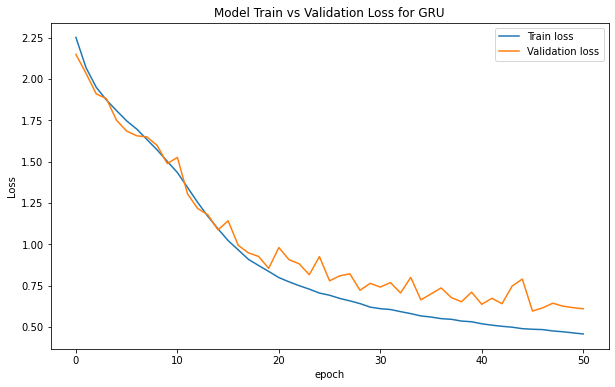

In [124]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(256,128),Dense1,adam -t

In [125]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=128))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 347,265
Trainable params: 347,265
Non-trainable params: 0
_________________________________________________________________


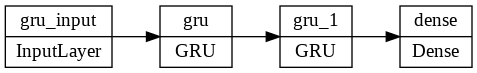

In [126]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [127]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 13s 7ms/step - loss: 2.2574 - mean_squared_error: 2.2574 - val_loss: 2.1641 - val_mean_squared_error: 2.1641
Epoch 2/100
1545/1545 [==============================] - 10s 7ms/step - loss: 2.0298 - mean_squared_error: 2.0298 - val_loss: 1.9735 - val_mean_squared_error: 1.9735
Epoch 3/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.9008 - mean_squared_error: 1.9008 - val_loss: 1.8542 - val_mean_squared_error: 1.8542
Epoch 4/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.8057 - mean_squared_error: 1.8057 - val_loss: 1.7570 - val_mean_squared_error: 1.7570
Epoch 5/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.7091 - mean_squared_error: 1.7091 - val_loss: 1.7297 - val_mean_squared_error: 1.7297
Epoch 6/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.6213 - mean_squared_error: 1.6213 - val_loss: 1.5685 - val_mean_squared_error: 1.5685
Epoc

In [128]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [129]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.6357 - mean_squared_error: 0.6357
MSE =  [0.635666012763977, 0.635666012763977]


In [130]:
confirm_result(y_test,y_pred)

,Results
MAE,0.58010
RMSE,0.79729
R2,0.72242


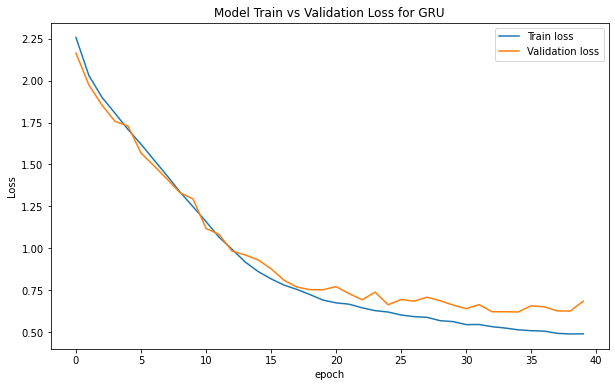

In [131]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(256,128),Dense1,RMSprop -t

In [132]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=128))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 347,265
Trainable params: 347,265
Non-trainable params: 0
_________________________________________________________________


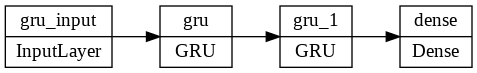

In [133]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [134]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 14s 7ms/step - loss: 2.2728 - mean_squared_error: 2.2728 - val_loss: 2.2204 - val_mean_squared_error: 2.2204
Epoch 2/100
1545/1545 [==============================] - 10s 7ms/step - loss: 2.0635 - mean_squared_error: 2.0635 - val_loss: 2.0184 - val_mean_squared_error: 2.0184
Epoch 3/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.9486 - mean_squared_error: 1.9486 - val_loss: 1.8868 - val_mean_squared_error: 1.8868
Epoch 4/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.8795 - mean_squared_error: 1.8795 - val_loss: 1.8149 - val_mean_squared_error: 1.8149
Epoch 5/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.8003 - mean_squared_error: 1.8003 - val_loss: 1.7896 - val_mean_squared_error: 1.7896
Epoch 6/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.7161 - mean_squared_error: 1.7161 - val_loss: 1.8261 - val_mean_squared_error: 1.8261
Epoc

In [135]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [136]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.7296 - mean_squared_error: 0.7296
MSE =  [0.7296298146247864, 0.7296298146247864]


In [137]:
confirm_result(y_test,y_pred)

,Results
MAE,0.63686
RMSE,0.85418
R2,0.68138


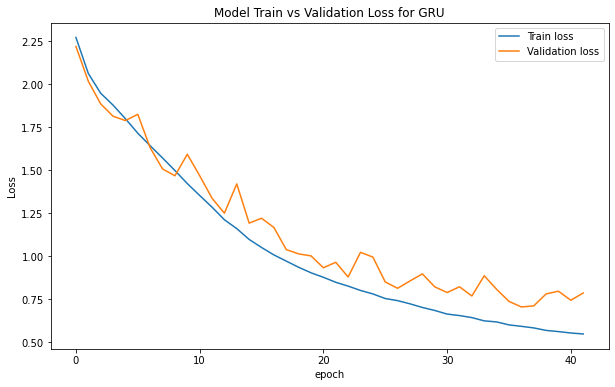

In [138]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(256,256),Dense1,adam

In [139]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=256))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 593,921
Trainable params: 593,921
Non-trainable params: 0
_________________________________________________________________


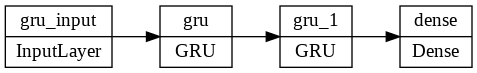

In [140]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [141]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 14s 8ms/step - loss: 2.2511 - mean_squared_error: 2.2511 - val_loss: 2.0633 - val_mean_squared_error: 2.0633
Epoch 2/100
1545/1545 [==============================] - 11s 7ms/step - loss: 2.0008 - mean_squared_error: 2.0008 - val_loss: 1.9359 - val_mean_squared_error: 1.9359
Epoch 3/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.8897 - mean_squared_error: 1.8897 - val_loss: 1.8569 - val_mean_squared_error: 1.8569
Epoch 4/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.8059 - mean_squared_error: 1.8059 - val_loss: 1.7638 - val_mean_squared_error: 1.7638
Epoch 5/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.7140 - mean_squared_error: 1.7140 - val_loss: 1.6740 - val_mean_squared_error: 1.6740
Epoch 6/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.5976 - mean_squared_error: 1.5976 - val_loss: 1.5637 - val_mean_squared_error: 1.5637
Epoc

In [142]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [143]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.5401 - mean_squared_error: 0.5401
MSE =  [0.5400689244270325, 0.5400689244270325]


In [144]:
confirm_result(y_test,y_pred)

,Results
MAE,0.51647
RMSE,0.73489
R2,0.76416


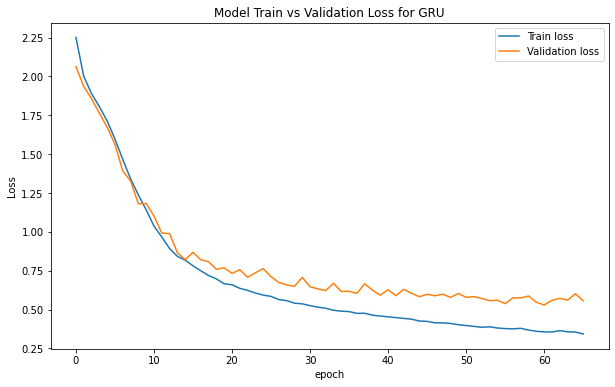

In [145]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1(512),Dense1,adam - 0.52 -t

In [180]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=512,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 512)               791040    
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 791,553
Trainable params: 791,553
Non-trainable params: 0
_________________________________________________________________


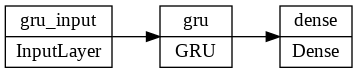

In [181]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [182]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 12s 7ms/step - loss: 2.2765 - mean_squared_error: 2.2765 - val_loss: 2.1480 - val_mean_squared_error: 2.1480
Epoch 2/100
1545/1545 [==============================] - 10s 7ms/step - loss: 2.0622 - mean_squared_error: 2.0622 - val_loss: 1.9468 - val_mean_squared_error: 1.9468
Epoch 3/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.9170 - mean_squared_error: 1.9170 - val_loss: 1.9280 - val_mean_squared_error: 1.9280
Epoch 4/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.8567 - mean_squared_error: 1.8567 - val_loss: 1.8008 - val_mean_squared_error: 1.8008
Epoch 5/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.7748 - mean_squared_error: 1.7748 - val_loss: 1.7394 - val_mean_squared_error: 1.7394
Epoch 6/100
1545/1545 [==============================] - 10s 7ms/step - loss: 1.6440 - mean_squared_error: 1.6440 - val_loss: 1.5345 - val_mean_squared_error: 1.5345
Epoc

In [183]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [184]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 3ms/step - loss: 0.5489 - mean_squared_error: 0.5489
MSE =  [0.5489171743392944, 0.5489171743392944]


In [185]:
confirm_result(y_test,y_pred)

,Results
MAE,0.50167
RMSE,0.74089
R2,0.76030


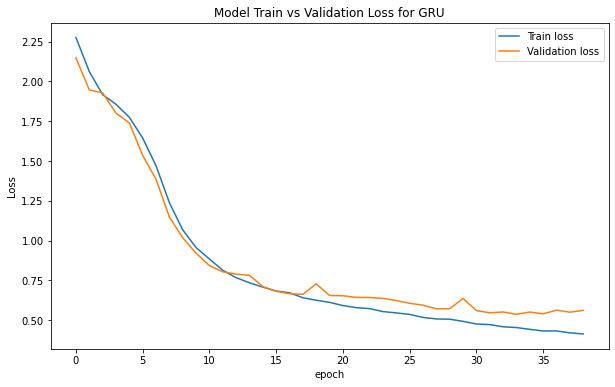

In [186]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1(512),Dense1,RMSprop -t

In [153]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=512,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 512)               791040    
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 791,553
Trainable params: 791,553
Non-trainable params: 0
_________________________________________________________________


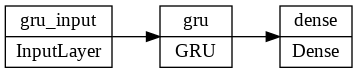

In [154]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [155]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 13s 7ms/step - loss: 2.2816 - mean_squared_error: 2.2816 - val_loss: 2.1065 - val_mean_squared_error: 2.1065
Epoch 2/100
1545/1545 [==============================] - 11s 7ms/step - loss: 2.0439 - mean_squared_error: 2.0439 - val_loss: 2.0380 - val_mean_squared_error: 2.0380
Epoch 3/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.9339 - mean_squared_error: 1.9339 - val_loss: 2.1890 - val_mean_squared_error: 2.1890
Epoch 4/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.8788 - mean_squared_error: 1.8788 - val_loss: 1.9119 - val_mean_squared_error: 1.9119
Epoch 5/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.8108 - mean_squared_error: 1.8108 - val_loss: 1.7789 - val_mean_squared_error: 1.7789
Epoch 6/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.6920 - mean_squared_error: 1.6920 - val_loss: 1.5916 - val_mean_squared_error: 1.5916
Epoc

In [156]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [157]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 1s 3ms/step - loss: 0.5598 - mean_squared_error: 0.5598
MSE =  [0.5597667694091797, 0.5597667694091797]


In [158]:
confirm_result(y_test,y_pred)

,Results
MAE,0.51324
RMSE,0.74818
R2,0.75556


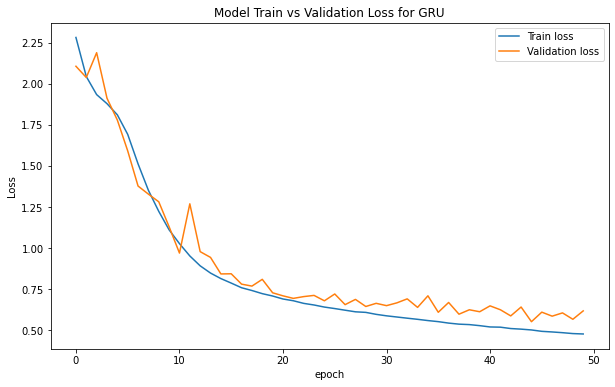

In [159]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1(512,32),Dense1,adam

In [187]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=512,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=32))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 512)           791040    
                                                                 
 gru_1 (GRU)                 (None, 32)                52416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 843,489
Trainable params: 843,489
Non-trainable params: 0
_________________________________________________________________


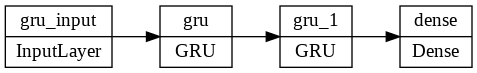

In [188]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [189]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 16s 9ms/step - loss: 2.2631 - mean_squared_error: 2.2631 - val_loss: 2.2277 - val_mean_squared_error: 2.2277
Epoch 2/100
1545/1545 [==============================] - 13s 8ms/step - loss: 2.0893 - mean_squared_error: 2.0893 - val_loss: 1.9647 - val_mean_squared_error: 1.9647
Epoch 3/100
1545/1545 [==============================] - 13s 8ms/step - loss: 1.9175 - mean_squared_error: 1.9175 - val_loss: 1.8714 - val_mean_squared_error: 1.8714
Epoch 4/100
1545/1545 [==============================] - 13s 8ms/step - loss: 1.8170 - mean_squared_error: 1.8170 - val_loss: 1.7697 - val_mean_squared_error: 1.7697
Epoch 5/100
1545/1545 [==============================] - 13s 8ms/step - loss: 1.7176 - mean_squared_error: 1.7176 - val_loss: 1.6432 - val_mean_squared_error: 1.6432
Epoch 6/100
1545/1545 [==============================] - 13s 8ms/step - loss: 1.6335 - mean_squared_error: 1.6335 - val_loss: 1.6407 - val_mean_squared_error: 1.6407
Epoc

In [190]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [191]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 4ms/step - loss: 0.5529 - mean_squared_error: 0.5529
MSE =  [0.5529438853263855, 0.5529438853263855]


In [192]:
confirm_result(y_test,y_pred)

,Results
MAE,0.51640
RMSE,0.74360
R2,0.75854


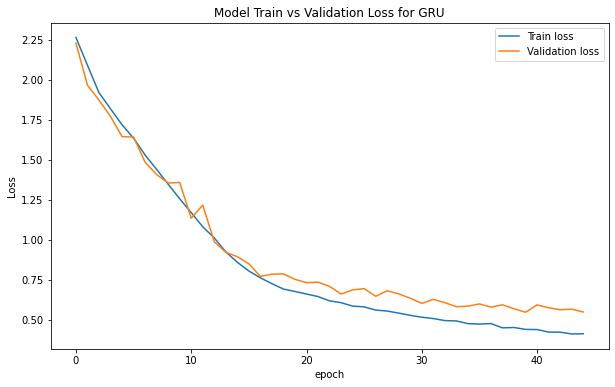

In [193]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1(512,128),Dense1,adam

In [160]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=512,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=128))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 512)           791040    
                                                                 
 gru_1 (GRU)                 (None, 128)               246528    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,037,697
Trainable params: 1,037,697
Non-trainable params: 0
_________________________________________________________________


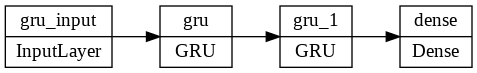

In [161]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [162]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 17s 9ms/step - loss: 2.2473 - mean_squared_error: 2.2473 - val_loss: 2.1178 - val_mean_squared_error: 2.1178
Epoch 2/100
1545/1545 [==============================] - 13s 9ms/step - loss: 2.0028 - mean_squared_error: 2.0028 - val_loss: 1.9077 - val_mean_squared_error: 1.9077
Epoch 3/100
1545/1545 [==============================] - 13s 9ms/step - loss: 1.8656 - mean_squared_error: 1.8656 - val_loss: 1.7670 - val_mean_squared_error: 1.7670
Epoch 4/100
1545/1545 [==============================] - 13s 9ms/step - loss: 1.7512 - mean_squared_error: 1.7512 - val_loss: 1.7082 - val_mean_squared_error: 1.7082
Epoch 5/100
1545/1545 [==============================] - 13s 9ms/step - loss: 1.6572 - mean_squared_error: 1.6572 - val_loss: 1.6125 - val_mean_squared_error: 1.6125
Epoch 6/100
1545/1545 [==============================] - 14s 9ms/step - loss: 1.5567 - mean_squared_error: 1.5567 - val_loss: 1.4847 - val_mean_squared_error: 1.4847
Epoc

In [163]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [164]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 4ms/step - loss: 0.5455 - mean_squared_error: 0.5455
MSE =  [0.545547366142273, 0.545547366142273]


In [165]:
confirm_result(y_test,y_pred)

,Results
MAE,0.51546
RMSE,0.73861
R2,0.76177


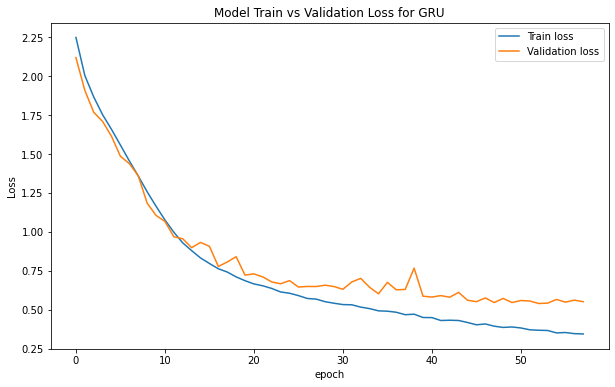

In [166]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1(512,256),Dense1,adam

In [167]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=512,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=256))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 512)           791040    
                                                                 
 gru_1 (GRU)                 (None, 256)               591360    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,382,657
Trainable params: 1,382,657
Non-trainable params: 0
_________________________________________________________________


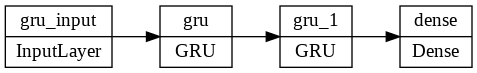

In [168]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [169]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 18s 10ms/step - loss: 2.3248 - mean_squared_error: 2.3248 - val_loss: 2.2024 - val_mean_squared_error: 2.2024
Epoch 2/100
1545/1545 [==============================] - 15s 10ms/step - loss: 2.1542 - mean_squared_error: 2.1542 - val_loss: 2.0813 - val_mean_squared_error: 2.0813
Epoch 3/100
1545/1545 [==============================] - 15s 10ms/step - loss: 2.0094 - mean_squared_error: 2.0094 - val_loss: 1.9186 - val_mean_squared_error: 1.9186
Epoch 4/100
1545/1545 [==============================] - 15s 10ms/step - loss: 1.8968 - mean_squared_error: 1.8968 - val_loss: 1.8368 - val_mean_squared_error: 1.8368
Epoch 5/100
1545/1545 [==============================] - 15s 10ms/step - loss: 1.8045 - mean_squared_error: 1.8045 - val_loss: 1.7528 - val_mean_squared_error: 1.7528
Epoch 6/100
1545/1545 [==============================] - 15s 10ms/step - loss: 1.7156 - mean_squared_error: 1.7156 - val_loss: 1.6341 - val_mean_squared_error: 1.634

In [170]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [171]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 4ms/step - loss: 0.5493 - mean_squared_error: 0.5493
MSE =  [0.5492651462554932, 0.5492651462554932]


In [172]:
confirm_result(y_test,y_pred)

,Results
MAE,0.51274
RMSE,0.74112
R2,0.76015


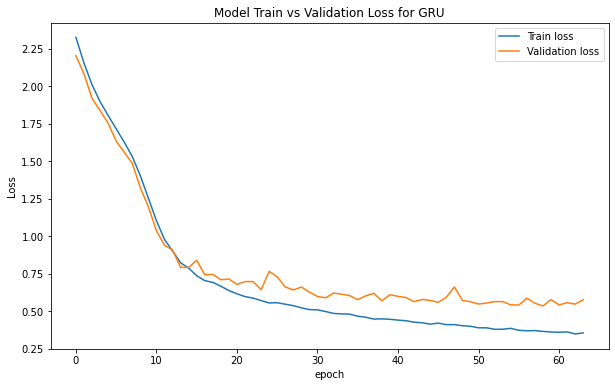

In [173]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1,Dense3(128,64,32,1),Drop2,Adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(64))
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(Dense(32))
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 60,673
Trainable params: 60,673
Non-traina

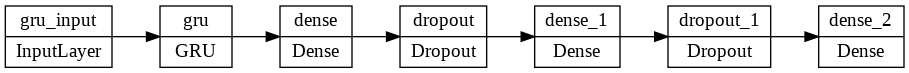

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 9s 5ms/step - loss: 2.4177 - mean_squared_error: 2.4177 - val_loss: 2.2302 - val_mean_squared_error: 2.2302
Epoch 2/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.2501 - mean_squared_error: 2.2501 - val_loss: 2.1374 - val_mean_squared_error: 2.1374
Epoch 3/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.1496 - mean_squared_error: 2.1496 - val_loss: 2.0497 - val_mean_squared_error: 2.0497
Epoch 4/100
1545/1545 [==============================] - 8s 5ms/step - loss: 2.1034 - mean_squared_error: 2.1034 - val_loss: 2.0609 - val_mean_squared_error: 2.0609
Epoch 5/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.0657 - mean_squared_error: 2.0657 - val_loss: 2.0535 - val_mean_squared_error: 2.0535
Epoch 6/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.0283 - mean_squared_error: 2.0283 - val_loss: 2.0035 - val_mean_squared_error: 2.0035
Epoch 7/10

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 1s 3ms/step - loss: 0.6708 - mean_squared_error: 0.6708
MSE =  [0.6708278059959412, 0.6708278059959412]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.59725
RMSE,0.81904
R2,0.70706


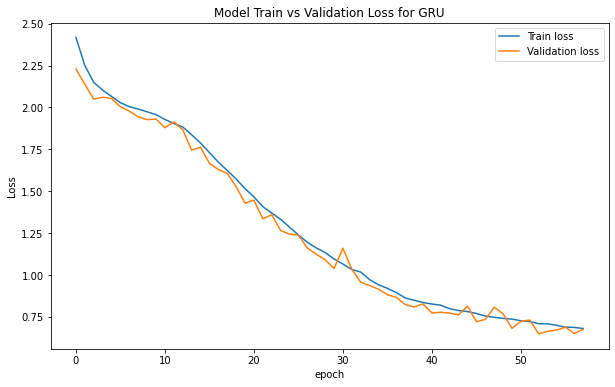

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1,Dense3,(64,32,16,1),Drop1,Adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=64,input_shape=(30, 1)))
model_gru.add(Dense(32))
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(Dense(16))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,489
Trainable params: 15,489
Non-trainable params: 0
_________________________________________________________________


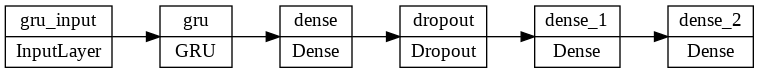

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [153]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 9s 5ms/step - loss: 2.3544 - mean_squared_error: 2.3544 - val_loss: 2.2472 - val_mean_squared_error: 2.2472
Epoch 2/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.2114 - mean_squared_error: 2.2114 - val_loss: 2.2019 - val_mean_squared_error: 2.2019
Epoch 3/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.0944 - mean_squared_error: 2.0944 - val_loss: 2.0646 - val_mean_squared_error: 2.0646
Epoch 4/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.0586 - mean_squared_error: 2.0586 - val_loss: 2.0905 - val_mean_squared_error: 2.0905
Epoch 5/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.0336 - mean_squared_error: 2.0336 - val_loss: 1.9942 - val_mean_squared_error: 1.9942
Epoch 6/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.0193 - mean_squared_error: 2.0193 - val_loss: 1.9979 - val_mean_squared_error: 1.9979
Epoch 7/10

In [154]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [155]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 1s 3ms/step - loss: 0.6911 - mean_squared_error: 0.6911
MSE =  [0.6911442875862122, 0.6911442875862122]


In [156]:
confirm_result(y_test,y_pred)

,Results
MAE,0.61536
RMSE,0.83135
R2,0.69819


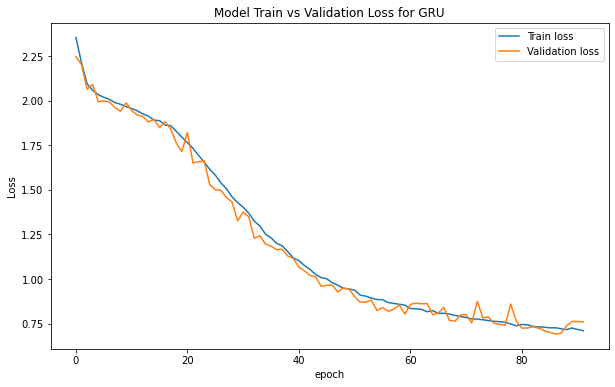

In [157]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(128,64),Dense1,Drop1,Adam

In [158]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1), return_sequences=True))
model_gru.add(GRU(64))
model_gru.add(tf.keras.layers.Dropout(0.5))
#model_gru.add(Dense(1, activation='sigmoid')) # output = 1
model_gru.add(Dense(1)) # output = 1
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           50304     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 87,617
Trainable params: 87,617
Non-trainable params: 0
_________________________________________________________________


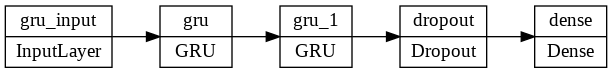

In [159]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [160]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 13s 7ms/step - loss: 2.3357 - mean_squared_error: 2.3357 - val_loss: 2.2706 - val_mean_squared_error: 2.2706
Epoch 2/100
1545/1545 [==============================] - 9s 6ms/step - loss: 2.1914 - mean_squared_error: 2.1914 - val_loss: 2.1412 - val_mean_squared_error: 2.1412
Epoch 3/100
1545/1545 [==============================] - 9s 6ms/step - loss: 2.1030 - mean_squared_error: 2.1030 - val_loss: 2.0055 - val_mean_squared_error: 2.0055
Epoch 4/100
1545/1545 [==============================] - 10s 6ms/step - loss: 2.0212 - mean_squared_error: 2.0212 - val_loss: 1.9352 - val_mean_squared_error: 1.9352
Epoch 5/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.9702 - mean_squared_error: 1.9702 - val_loss: 1.9155 - val_mean_squared_error: 1.9155
Epoch 6/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.9328 - mean_squared_error: 1.9328 - val_loss: 1.8773 - val_mean_squared_error: 1.8773
Epoch 7/

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

In [ ]:
confirm_result(y_test,y_pred)

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU2(128,64),Dense2(128,1),Drop1,Adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1), return_sequences=True))
model_gru.add(Dense(128)) # output = 1|
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(GRU(64))
model_gru.add(Dense(1)) # output = 1
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

In [ ]:
confirm_result(y_test,y_pred)

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

## GRU1,Dense1,**RMSprop**

In [174]:
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [175]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_gru = model_gru.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 9s 5ms/step - loss: 2.2819 - val_loss: 2.2111
Epoch 2/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.1242 - val_loss: 2.1588
Epoch 3/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.0497 - val_loss: 2.0219
Epoch 4/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.9874 - val_loss: 2.0190
Epoch 5/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.9382 - val_loss: 1.8941
Epoch 6/100
1545/1545 [==============================] - 7s 4ms/step - loss: 1.9073 - val_loss: 1.8605
Epoch 7/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.8755 - val_loss: 1.9234
Epoch 8/100
1545/1545 [==============================] - 7s 4ms/step - loss: 1.8333 - val_loss: 1.8264
Epoch 9/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.7890 - val_loss: 1.7633
Epoch 10/100
1545/1545 [==============================] - 7s 5ms/step - l

In [176]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [177]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 1s 2ms/step - loss: 0.6317
MSE =  0.6317240595817566


In [178]:
confirm_result(y_test,y_pred)

,Results
MAE,0.56829
RMSE,0.79481
R2,0.72414


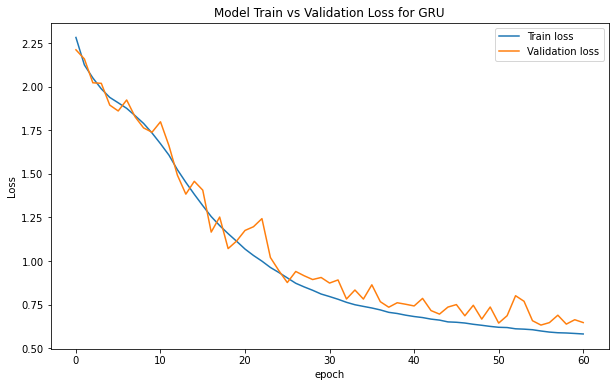

In [179]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

#LSTM

##LSTM1,Dense1,adam

In [66]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


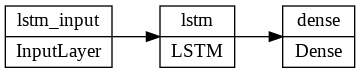

In [67]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [68]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 9s 5ms/step - loss: 2.2852 - mean_squared_error: 2.2852 - val_loss: 2.2495 - val_mean_squared_error: 2.2495
Epoch 2/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.1753 - mean_squared_error: 2.1753 - val_loss: 2.0879 - val_mean_squared_error: 2.0879
Epoch 3/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.0720 - mean_squared_error: 2.0720 - val_loss: 2.0673 - val_mean_squared_error: 2.0673
Epoch 4/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.0511 - mean_squared_error: 2.0511 - val_loss: 2.0654 - val_mean_squared_error: 2.0654
Epoch 5/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.0260 - mean_squared_error: 2.0260 - val_loss: 1.9983 - val_mean_squared_error: 1.9983
Epoch 6/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.9921 - mean_squared_error: 1.9921 - val_loss: 1.9706 - val_mean_squared_error: 1.9706
Epoch 7/10

In [69]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [70]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 1s 3ms/step - loss: 0.6680 - mean_squared_error: 0.6680
[0.6680235266685486, 0.6680235266685486]


In [71]:
confirm_result(y_test,y_pred)

,Results
MAE,0.57738
RMSE,0.81733
R2,0.70829


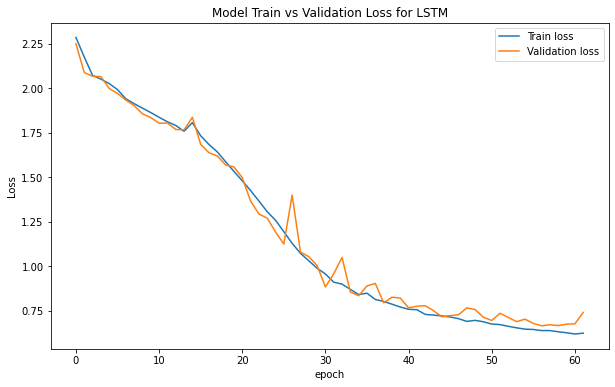

In [73]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM2(128,32),Dense1,adam

In [74]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1), return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(32)) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 87,201
Trainable params: 87,201
Non-trainable params: 0
_________________________________________________________________


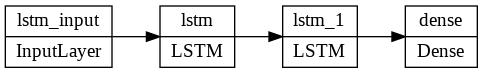

In [75]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [76]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 13s 7ms/step - loss: 2.2562 - mean_squared_error: 2.2562 - val_loss: 2.1352 - val_mean_squared_error: 2.1352
Epoch 2/100
1545/1545 [==============================] - 10s 6ms/step - loss: 2.0901 - mean_squared_error: 2.0901 - val_loss: 2.0572 - val_mean_squared_error: 2.0572
Epoch 3/100
1545/1545 [==============================] - 10s 6ms/step - loss: 2.0274 - mean_squared_error: 2.0274 - val_loss: 2.0001 - val_mean_squared_error: 2.0001
Epoch 4/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.9786 - mean_squared_error: 1.9786 - val_loss: 1.9515 - val_mean_squared_error: 1.9515
Epoch 5/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.9355 - mean_squared_error: 1.9355 - val_loss: 1.9495 - val_mean_squared_error: 1.9495
Epoch 6/100
1545/1545 [==============================] - 10s 6ms/step - loss: 1.9093 - mean_squared_error: 1.9093 - val_loss: 1.8841 - val_mean_squared_error: 1.8841
Epoc

In [77]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [78]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 2s 3ms/step - loss: 0.7221 - mean_squared_error: 0.7221
[0.7221421003341675, 0.7221421003341675]


In [79]:
confirm_result(y_test,y_pred)

,Results
MAE,0.61737
RMSE,0.84979
R2,0.68465


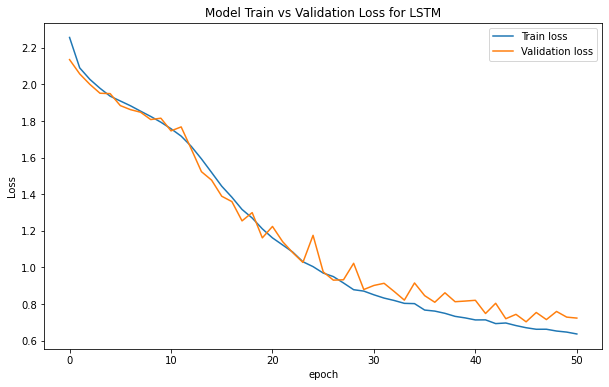

In [80]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM1(256),Dense1,adam -t

In [81]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


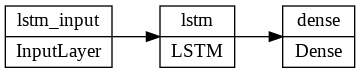

In [82]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [83]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 11s 6ms/step - loss: 2.2808 - mean_squared_error: 2.2808 - val_loss: 2.2574 - val_mean_squared_error: 2.2574
Epoch 2/100
1545/1545 [==============================] - 8s 5ms/step - loss: 2.1938 - mean_squared_error: 2.1938 - val_loss: 2.1002 - val_mean_squared_error: 2.1002
Epoch 3/100
1545/1545 [==============================] - 8s 5ms/step - loss: 2.0572 - mean_squared_error: 2.0572 - val_loss: 2.0038 - val_mean_squared_error: 2.0038
Epoch 4/100
1545/1545 [==============================] - 8s 5ms/step - loss: 1.9783 - mean_squared_error: 1.9783 - val_loss: 1.9710 - val_mean_squared_error: 1.9710
Epoch 5/100
1545/1545 [==============================] - 8s 5ms/step - loss: 2.1342 - mean_squared_error: 2.1342 - val_loss: 2.0573 - val_mean_squared_error: 2.0573
Epoch 6/100
1545/1545 [==============================] - 9s 6ms/step - loss: 2.0617 - mean_squared_error: 2.0617 - val_loss: 2.0341 - val_mean_squared_error: 2.0341
Epoch 7/1

In [84]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [85]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 1s 3ms/step - loss: 0.6428 - mean_squared_error: 0.6428
[0.6427515745162964, 0.6427515745162964]


In [86]:
confirm_result(y_test,y_pred)

,Results
MAE,0.55963
RMSE,0.80172
R2,0.71932


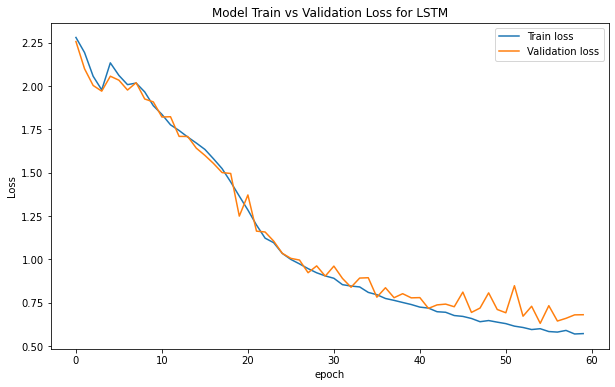

In [87]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM1(256),Dense1,RMSprop -t

In [21]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


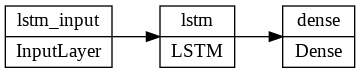

In [22]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [23]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 25s 11ms/step - loss: 2.2938 - mean_squared_error: 2.2938 - val_loss: 2.1859 - val_mean_squared_error: 2.1859
Epoch 2/100
1545/1545 [==============================] - 9s 6ms/step - loss: 2.1173 - mean_squared_error: 2.1173 - val_loss: 2.0646 - val_mean_squared_error: 2.0646
Epoch 3/100
1545/1545 [==============================] - 9s 6ms/step - loss: 2.0166 - mean_squared_error: 2.0166 - val_loss: 1.9995 - val_mean_squared_error: 1.9995
Epoch 4/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.9745 - mean_squared_error: 1.9745 - val_loss: 1.9777 - val_mean_squared_error: 1.9777
Epoch 5/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.9465 - mean_squared_error: 1.9465 - val_loss: 1.9139 - val_mean_squared_error: 1.9139
Epoch 6/100
1545/1545 [==============================] - 9s 6ms/step - loss: 1.9216 - mean_squared_error: 1.9216 - val_loss: 1.9070 - val_mean_squared_error: 1.9070
Epoch 7/

In [24]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [25]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 1s 3ms/step - loss: 0.6084 - mean_squared_error: 0.6084
[0.6083844900131226, 0.6083844900131226]


In [26]:
confirm_result(y_test,y_pred)

,Results
MAE,0.54717
RMSE,0.77999
R2,0.73433


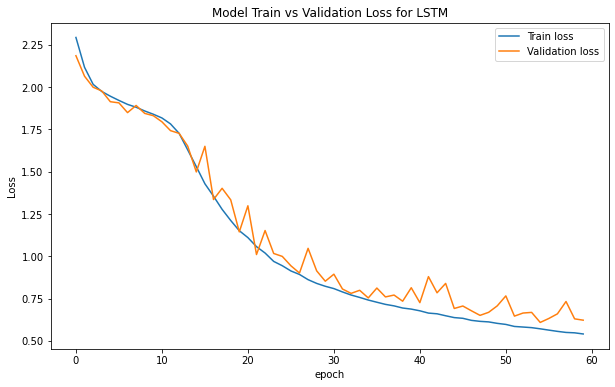

In [27]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM2(256,32),Dense1,adam -t

In [28]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 32)                36992     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 301,217
Trainable params: 301,217
Non-trainable params: 0
_________________________________________________________________


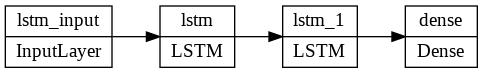

In [29]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [30]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 15s 8ms/step - loss: 2.2560 - mean_squared_error: 2.2560 - val_loss: 2.1745 - val_mean_squared_error: 2.1745
Epoch 2/100
1545/1545 [==============================] - 11s 7ms/step - loss: 2.0936 - mean_squared_error: 2.0936 - val_loss: 2.0268 - val_mean_squared_error: 2.0268
Epoch 3/100
1545/1545 [==============================] - 11s 7ms/step - loss: 2.0076 - mean_squared_error: 2.0076 - val_loss: 2.0275 - val_mean_squared_error: 2.0275
Epoch 4/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.9446 - mean_squared_error: 1.9446 - val_loss: 1.9381 - val_mean_squared_error: 1.9381
Epoch 5/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.9034 - mean_squared_error: 1.9034 - val_loss: 1.8761 - val_mean_squared_error: 1.8761
Epoch 6/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.8681 - mean_squared_error: 1.8681 - val_loss: 1.8439 - val_mean_squared_error: 1.8439
Epoc

In [31]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [32]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 2s 4ms/step - loss: 0.5878 - mean_squared_error: 0.5878
[0.5877702832221985, 0.5877702832221985]


In [33]:
confirm_result(y_test,y_pred)

,Results
MAE,0.52974
RMSE,0.76666
R2,0.74333


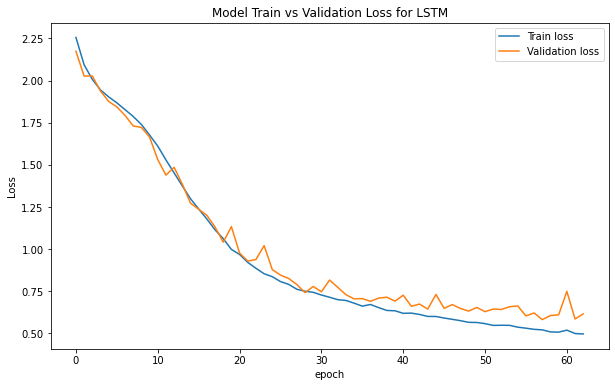

In [34]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM2(256,32),Dense1,RMSprop -t

In [20]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 32)                36992     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 301,217
Trainable params: 301,217
Non-trainable params: 0
_________________________________________________________________


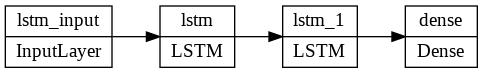

In [21]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [22]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 18s 8ms/step - loss: 2.2795 - mean_squared_error: 2.2795 - val_loss: 2.2121 - val_mean_squared_error: 2.2121
Epoch 2/100
1545/1545 [==============================] - 11s 7ms/step - loss: 2.2006 - mean_squared_error: 2.2006 - val_loss: 2.0785 - val_mean_squared_error: 2.0785
Epoch 3/100
1545/1545 [==============================] - 15s 10ms/step - loss: 2.0468 - mean_squared_error: 2.0468 - val_loss: 1.9576 - val_mean_squared_error: 1.9576
Epoch 4/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.9580 - mean_squared_error: 1.9580 - val_loss: 1.9414 - val_mean_squared_error: 1.9414
Epoch 5/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.9169 - mean_squared_error: 1.9169 - val_loss: 1.9533 - val_mean_squared_error: 1.9533
Epoch 6/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.8736 - mean_squared_error: 1.8736 - val_loss: 1.8997 - val_mean_squared_error: 1.8997
Epo

In [23]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [24]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 2s 3ms/step - loss: 0.7690 - mean_squared_error: 0.7690
[0.7689802646636963, 0.7689802646636963]


In [25]:
confirm_result(y_test,y_pred)

,Results
MAE,0.64756
RMSE,0.87691
R2,0.66420


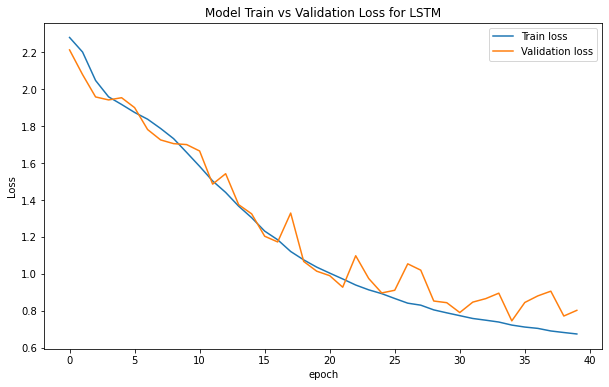

In [26]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


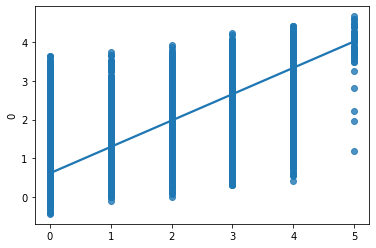

In [27]:
import seaborn as sns

#create scatterplot with regression line and confidence interval lines
sns.regplot(y_test, y_pred)

##LSTM2(256,128),Dense1,adam -t

In [28]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=128))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________


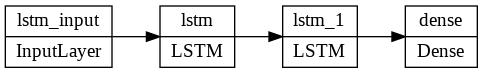

In [29]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [30]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 15s 8ms/step - loss: 2.2748 - mean_squared_error: 2.2748 - val_loss: 2.2140 - val_mean_squared_error: 2.2140
Epoch 2/100
1545/1545 [==============================] - 11s 7ms/step - loss: 2.1195 - mean_squared_error: 2.1195 - val_loss: 2.0891 - val_mean_squared_error: 2.0891
Epoch 3/100
1545/1545 [==============================] - 11s 7ms/step - loss: 2.0397 - mean_squared_error: 2.0397 - val_loss: 2.0625 - val_mean_squared_error: 2.0625
Epoch 4/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.9702 - mean_squared_error: 1.9702 - val_loss: 1.9562 - val_mean_squared_error: 1.9562
Epoch 5/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.9281 - mean_squared_error: 1.9281 - val_loss: 1.8796 - val_mean_squared_error: 1.8796
Epoch 6/100
1545/1545 [==============================] - 11s 7ms/step - loss: 1.9005 - mean_squared_error: 1.9005 - val_loss: 1.8581 - val_mean_squared_error: 1.8581
Epoc

In [31]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [32]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 2s 3ms/step - loss: 0.6058 - mean_squared_error: 0.6058
[0.6057968139648438, 0.6057968139648438]


In [33]:
confirm_result(y_test,y_pred)

,Results
MAE,0.54573
RMSE,0.77833
R2,0.73546


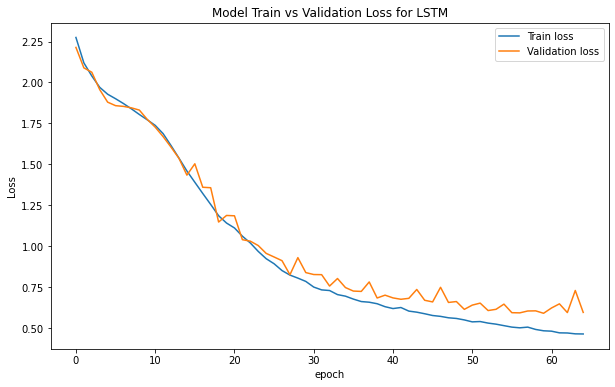

In [34]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM2(256,128),Dense1,RMSprop -t

In [35]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=128))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________


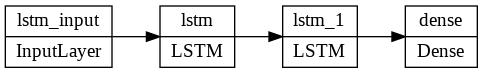

In [36]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [37]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 15s 8ms/step - loss: 2.2261 - mean_squared_error: 2.2261 - val_loss: 2.0888 - val_mean_squared_error: 2.0888
Epoch 2/100
1545/1545 [==============================] - 12s 8ms/step - loss: 2.0790 - mean_squared_error: 2.0790 - val_loss: 2.1711 - val_mean_squared_error: 2.1711
Epoch 3/100
1545/1545 [==============================] - 12s 8ms/step - loss: 1.9729 - mean_squared_error: 1.9729 - val_loss: 1.9129 - val_mean_squared_error: 1.9129
Epoch 4/100
1545/1545 [==============================] - 12s 8ms/step - loss: 1.9211 - mean_squared_error: 1.9211 - val_loss: 1.9900 - val_mean_squared_error: 1.9900
Epoch 5/100
1545/1545 [==============================] - 12s 8ms/step - loss: 1.8762 - mean_squared_error: 1.8762 - val_loss: 1.8577 - val_mean_squared_error: 1.8577
Epoch 6/100
1545/1545 [==============================] - 12s 8ms/step - loss: 1.8374 - mean_squared_error: 1.8374 - val_loss: 1.8410 - val_mean_squared_error: 1.8410
Epoc

In [38]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [39]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 2s 3ms/step - loss: 0.6771 - mean_squared_error: 0.6771
[0.6771345138549805, 0.6771345138549805]


In [40]:
confirm_result(y_test,y_pred)

,Results
MAE,0.57038
RMSE,0.82288
R2,0.70431


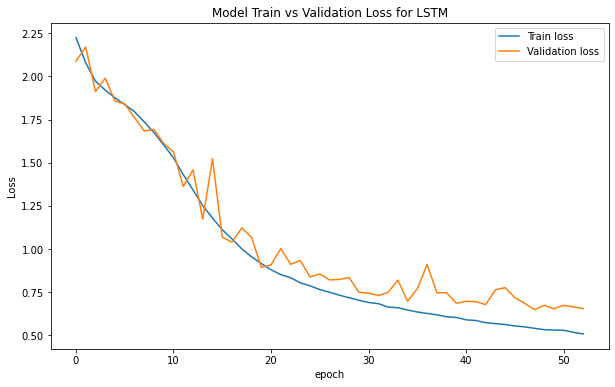

In [41]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM1(512),Dense1,adam

In [42]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(512, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 1,053,185
Trainable params: 1,053,185
Non-trainable params: 0
_________________________________________________________________


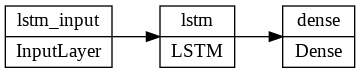

In [43]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [44]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 14s 8ms/step - loss: 2.3327 - mean_squared_error: 2.3327 - val_loss: 2.2569 - val_mean_squared_error: 2.2569
Epoch 2/100
1545/1545 [==============================] - 12s 8ms/step - loss: 2.2336 - mean_squared_error: 2.2336 - val_loss: 2.2058 - val_mean_squared_error: 2.2058
Epoch 3/100
1545/1545 [==============================] - 12s 8ms/step - loss: 2.1158 - mean_squared_error: 2.1158 - val_loss: 2.0622 - val_mean_squared_error: 2.0622
Epoch 4/100
1545/1545 [==============================] - 12s 8ms/step - loss: 2.0301 - mean_squared_error: 2.0301 - val_loss: 2.0328 - val_mean_squared_error: 2.0328
Epoch 5/100
1545/1545 [==============================] - 13s 8ms/step - loss: 1.9767 - mean_squared_error: 1.9767 - val_loss: 1.9603 - val_mean_squared_error: 1.9603
Epoch 6/100
1545/1545 [==============================] - 12s 8ms/step - loss: 1.9459 - mean_squared_error: 1.9459 - val_loss: 1.9230 - val_mean_squared_error: 1.9230
Epoc

In [45]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [46]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 2s 3ms/step - loss: 0.6648 - mean_squared_error: 0.6648
[0.6647786498069763, 0.6647786498069763]


In [47]:
confirm_result(y_test,y_pred)

,Results
MAE,0.56180
RMSE,0.81534
R2,0.70970


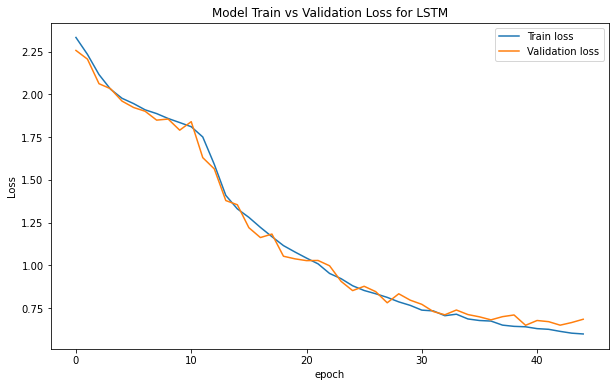

In [48]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM1(512,32),Dense1,adam

In [49]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(512, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 512)           1052672   
                                                                 
 lstm_1 (LSTM)               (None, 32)                69760     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,122,465
Trainable params: 1,122,465
Non-trainable params: 0
_________________________________________________________________


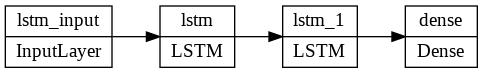

In [50]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [51]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 18s 10ms/step - loss: 2.2748 - mean_squared_error: 2.2748 - val_loss: 2.3099 - val_mean_squared_error: 2.3099
Epoch 2/100
1545/1545 [==============================] - 15s 9ms/step - loss: 2.2879 - mean_squared_error: 2.2879 - val_loss: 2.3081 - val_mean_squared_error: 2.3081
Epoch 3/100
1545/1545 [==============================] - 15s 10ms/step - loss: 2.2881 - mean_squared_error: 2.2881 - val_loss: 2.3081 - val_mean_squared_error: 2.3081
Epoch 4/100
1545/1545 [==============================] - 15s 9ms/step - loss: 2.2859 - mean_squared_error: 2.2859 - val_loss: 2.3197 - val_mean_squared_error: 2.3197
Epoch 5/100
1545/1545 [==============================] - 15s 10ms/step - loss: 2.2891 - mean_squared_error: 2.2891 - val_loss: 2.3075 - val_mean_squared_error: 2.3075
Epoch 6/100
1545/1545 [==============================] - 15s 9ms/step - loss: 2.2804 - mean_squared_error: 2.2804 - val_loss: 2.3131 - val_mean_squared_error: 2.3131
E

In [52]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [53]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 2s 4ms/step - loss: 2.2894 - mean_squared_error: 2.2894
[2.2894155979156494, 2.2894155979156494]


In [54]:
confirm_result(y_test,y_pred)

,Results
MAE,1.34079
RMSE,1.51308
R2,0.00025


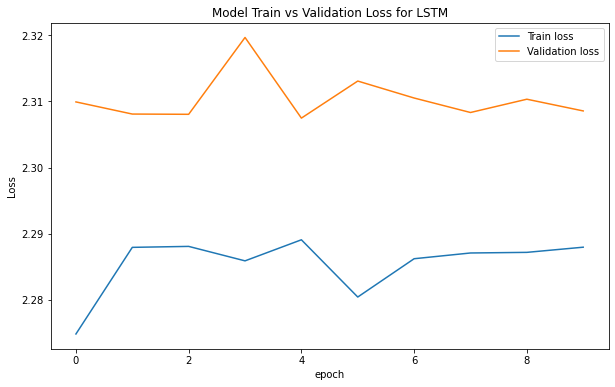

In [55]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM1(512,128),Dense1,adam

In [56]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(512, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=128))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 512)           1052672   
                                                                 
 lstm_1 (LSTM)               (None, 128)               328192    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,380,993
Trainable params: 1,380,993
Non-trainable params: 0
_________________________________________________________________


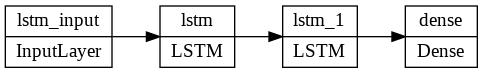

In [57]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [58]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 19s 11ms/step - loss: 2.2666 - mean_squared_error: 2.2666 - val_loss: 2.1999 - val_mean_squared_error: 2.1999
Epoch 2/100
1545/1545 [==============================] - 16s 10ms/step - loss: 2.1000 - mean_squared_error: 2.1000 - val_loss: 2.1158 - val_mean_squared_error: 2.1158
Epoch 3/100
1545/1545 [==============================] - 16s 10ms/step - loss: 1.9920 - mean_squared_error: 1.9920 - val_loss: 1.9432 - val_mean_squared_error: 1.9432
Epoch 4/100
1545/1545 [==============================] - 16s 10ms/step - loss: 1.9303 - mean_squared_error: 1.9303 - val_loss: 1.8663 - val_mean_squared_error: 1.8663
Epoch 5/100
1545/1545 [==============================] - 17s 11ms/step - loss: 1.8850 - mean_squared_error: 1.8850 - val_loss: 1.8371 - val_mean_squared_error: 1.8371
Epoch 6/100
1545/1545 [==============================] - 16s 10ms/step - loss: 1.8537 - mean_squared_error: 1.8537 - val_loss: 1.7946 - val_mean_squared_error: 1.794

In [59]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [60]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 2s 4ms/step - loss: 0.6732 - mean_squared_error: 0.6732
[0.6732039451599121, 0.6732039451599121]


In [61]:
confirm_result(y_test,y_pred)

,Results
MAE,0.57339
RMSE,0.82049
R2,0.70602


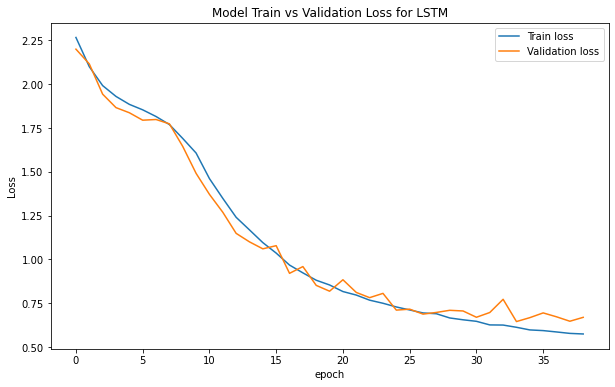

In [62]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM1(512,256),Dense1,adam

In [63]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(512, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=256))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 512)           1052672   
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,840,385
Trainable params: 1,840,385
Non-trainable params: 0
_________________________________________________________________


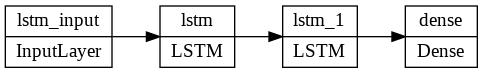

In [64]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [65]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 21s 12ms/step - loss: 2.2734 - mean_squared_error: 2.2734 - val_loss: 2.2364 - val_mean_squared_error: 2.2364
Epoch 2/100
1545/1545 [==============================] - 18s 11ms/step - loss: 2.1267 - mean_squared_error: 2.1267 - val_loss: 2.1186 - val_mean_squared_error: 2.1186
Epoch 3/100
1545/1545 [==============================] - 18s 12ms/step - loss: 2.0317 - mean_squared_error: 2.0317 - val_loss: 1.9965 - val_mean_squared_error: 1.9965
Epoch 4/100
1545/1545 [==============================] - 18s 11ms/step - loss: 1.9589 - mean_squared_error: 1.9589 - val_loss: 1.9154 - val_mean_squared_error: 1.9154
Epoch 5/100
1545/1545 [==============================] - 18s 11ms/step - loss: 1.9085 - mean_squared_error: 1.9085 - val_loss: 1.9258 - val_mean_squared_error: 1.9258
Epoch 6/100
1545/1545 [==============================] - 18s 12ms/step - loss: 1.8727 - mean_squared_error: 1.8727 - val_loss: 1.8079 - val_mean_squared_error: 1.807

In [66]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [67]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 2s 5ms/step - loss: 0.5299 - mean_squared_error: 0.5299
[0.5299466848373413, 0.5299466848373413]


In [68]:
confirm_result(y_test,y_pred)

,Results
MAE,0.48799
RMSE,0.72797
R2,0.76858


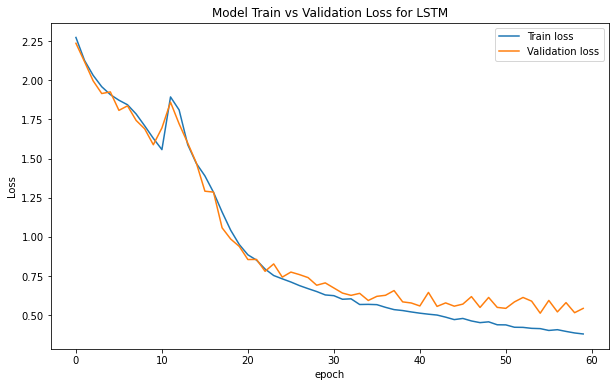

In [69]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

##LSTM1,Dense1,RMSprop

In [70]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential, load_model 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
#model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [71]:
callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5, verbose=1, restore_best_weights=True),
             ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True, save_weights_only=False)]
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_t, y_train, validation_split = 0.2, epochs=100,
          batch_size=32, verbose=1, callbacks=callbacks)

keras_model_best = load_model('best_model.h5')

Epoch 1/100
1545/1545 [==============================] - 9s 5ms/step - loss: 2.2617 - val_loss: 2.3936
Epoch 2/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.0998 - val_loss: 2.0497
Epoch 3/100
1545/1545 [==============================] - 7s 4ms/step - loss: 2.0415 - val_loss: 2.0660
Epoch 4/100
1545/1545 [==============================] - 7s 5ms/step - loss: 2.0229 - val_loss: 2.0321
Epoch 5/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.9955 - val_loss: 1.9901
Epoch 6/100
1545/1545 [==============================] - 7s 4ms/step - loss: 1.9549 - val_loss: 1.9886
Epoch 7/100
1545/1545 [==============================] - 7s 5ms/step - loss: 1.9134 - val_loss: 1.9141
Epoch 8/100
1545/1545 [==============================] - 7s 4ms/step - loss: 1.8935 - val_loss: 1.8544
Epoch 9/100
1545/1545 [==============================] - 7s 4ms/step - loss: 1.8663 - val_loss: 1.8185
Epoch 10/100
1545/1545 [==============================] - 7s 4ms/step - l

In [72]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [73]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 1s 2ms/step - loss: 0.7467
0.7466658353805542


In [74]:
confirm_result(y_test,y_pred)

,Results
MAE,0.63143
RMSE,0.86410
R2,0.67394


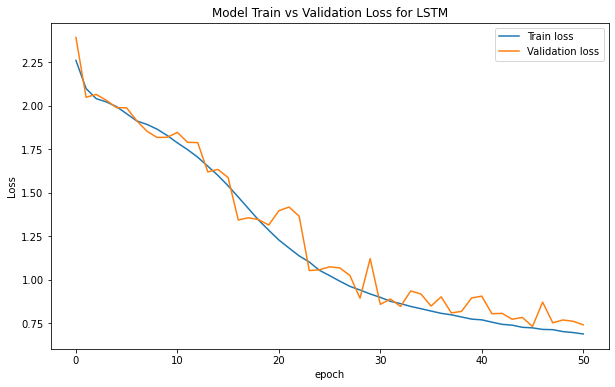

In [75]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstm, 'LSTM')

# AdaBoostGRU

##AdaBoostGRU(128),Dense1(tree2)

In [ ]:
!pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.0
    Uninstalling importlib-metadata-4.11.0:
      Successfully uninstalled importlib-metadata-4.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=100, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=2, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_adaboostgru.fit(X_train_t, y_train)

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/100
1931/1931 [==============================] - 79s 35ms/step - loss: 2.1299 - mean_squared_error: 2.1299
Epoch 2/100
1931/1931 [==============================] - 55s 28ms/step - loss: 1.9499 - mean_squared_error: 1.9499
Epoch 3/100
1931/1931 [==============================] - 51s 27ms/step - loss: 1.8487 - mean_squared_error: 1.8487
Epoch 4/100
1931/1931 [==============================] - 54s 28ms/step - loss: 1.6908 - mean_squared_error: 1.6908
Epoch 5/100
1931/1931 [==============================] - 51s 27ms/step - loss: 1.5332 - mean_squared_error: 1.5332
Epoch 6/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.3914 - mean_squared_error: 1.3914
Epoch 7/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.2451 - mean_squared_error: 1.2451
Epoch 8/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.1323 - mean_squared_error: 1.1323
Epoch 9/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 53s 27ms/step - loss: 0.6577 - mean_squared_error: 0.6577
Epoch 2/100
1931/1931 [==============================] - 53s 27ms/step - loss: 0.5435 - mean_squared_error: 0.5435
Epoch 3/100
1931/1931 [==============================] - 53s 27ms/step - loss: 0.4940 - mean_squared_error: 0.4940
Epoch 4/100
1931/1931 [==============================] - 61s 32ms/step - loss: 0.4840 - mean_squared_error: 0.4840
Epoch 5/100
1931/1931 [==============================] - 52s 27ms/step - loss: 0.4596 - mean_squared_error: 0.4596
Epoch 6/100
1931/1931 [==============================] - 53s 27ms/step - loss: 0.4365 - mean_squared_error: 0.4365
Epoch 7/100
1931/1931 [==============================] - 54s 28ms/step - loss: 0.4325 - mean_squared_error: 0.4325
Epoch 8/100
1931/1931 [==============================] - 54s 28ms/step - loss: 0.4217 - mean_squared_error: 0.4217
Epoch 9/100
1931/1931 [==============================] - 54s 28ms/step - loss: 0.4066 - mean

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7fc06d53bb00>, epochs=100),
                  n_estimators=2, random_state=42)

In [ ]:
score = model_adaboostgru.score(X_test_t, y_test)
print(score)

483/483 [==============================] - 6s 11ms/step
0.7406253395762763


##AdaBoostGRU(128), Dense1(tree 1)

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=100, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_ada = model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 55s 27ms/step - loss: 2.1015 - mean_squared_error: 2.1015
Epoch 2/100
1931/1931 [==============================] - 62s 32ms/step - loss: 1.9662 - mean_squared_error: 1.9662
Epoch 3/100
1931/1931 [==============================] - 53s 28ms/step - loss: 1.8726 - mean_squared_error: 1.8726
Epoch 4/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.7543 - mean_squared_error: 1.7543
Epoch 5/100
1931/1931 [==============================] - 53s 27ms/step - loss: 1.6168 - mean_squared_error: 1.6168
Epoch 6/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.4983 - mean_squared_error: 1.4983
Epoch 7/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.4182 - mean_squared_error: 1.4182
Epoch 8/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.3376 - mean_squared_error: 1.3376
Epoch 9/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.2549 - mean

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7f0e5ad077a0>, epochs=100),
                  n_estimators=1, random_state=42)

In [ ]:
score = model_adaboostgru.score(X_test_t, y_test)
print(score)

483/483 [==============================] - 4s 9ms/step
0.725080248542451


In [ ]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist_ada.history['loss'],'y',label='ada', color='green')

loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')


plt.show()

### Overfitting Solution
(1) 학습 데이터 부족

(2) Model Capacity가 높을 때(= 파라미터 개수가 많을 때)

#### 1. Model Capacity
Hidden Layer, Node 수를 줄이는 방법
- unit 128 -> 64

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=64,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=65, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/65


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 31s 15ms/step - loss: 2.1831 - mean_squared_error: 2.1831
Epoch 2/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.9864 - mean_squared_error: 1.9864
Epoch 3/65
1931/1931 [==============================] - 31s 16ms/step - loss: 1.9334 - mean_squared_error: 1.9334
Epoch 4/65
1931/1931 [==============================] - 30s 16ms/step - loss: 1.8534 - mean_squared_error: 1.8534
Epoch 5/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.7685 - mean_squared_error: 1.7685
Epoch 6/65
1931/1931 [==============================] - 30s 15ms/step - loss: 1.6812 - mean_squared_error: 1.6812
Epoch 7/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.6113 - mean_squared_error: 1.6113
Epoch 8/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.5449 - mean_squared_error: 1.5449
Epoch 9/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.4818 - mean_squared

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7ffad1705b00>, epochs=65),
                  n_estimators=1, random_state=42)

In [ ]:
y_pred = model_adaboostgru.predict(X_valid_t)

483/483 [==============================] - 2s 5ms/step


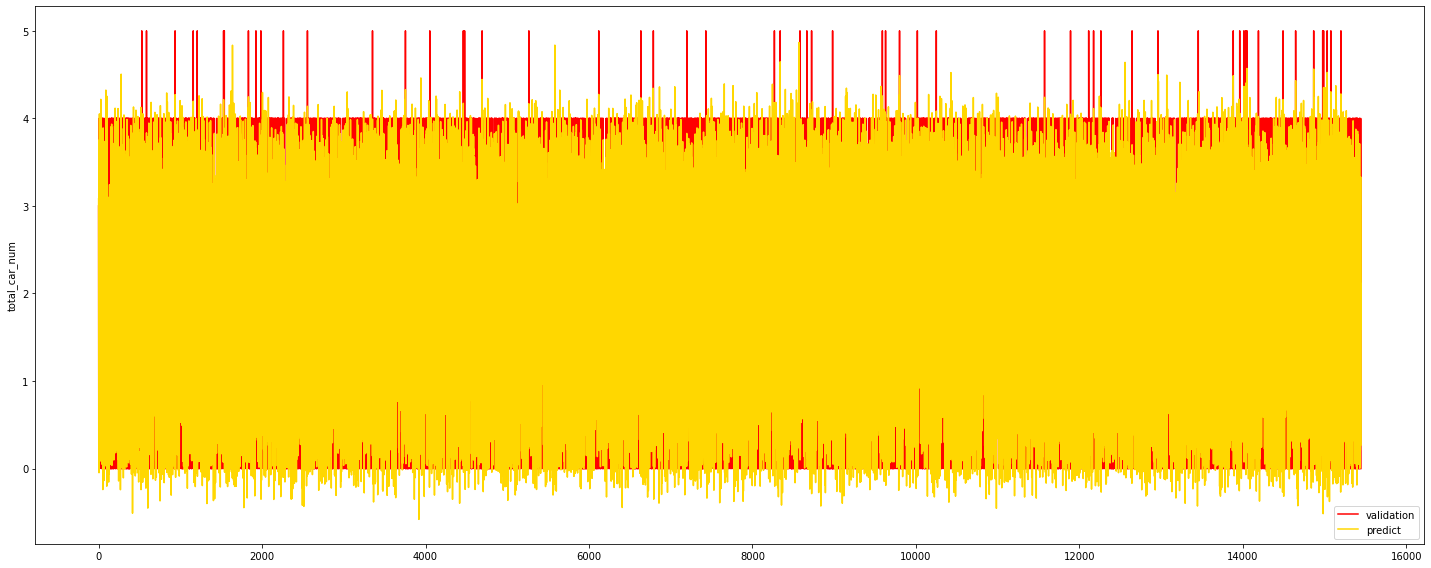

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

plt.plot(y_valid, color='red' , label='validation')
plt.plot(y_pred, color='gold' , label='predict')
plt.ylabel('total_car_num')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
score = model_adaboostgru.score(X_valid_t, y_valid)
print(score)

483/483 [==============================] - 3s 5ms/step
0.6865512247310462


#### 2. L2 Regularization
가중치 제곱에 비례하는 노이즈를 오차함수에 추가
- from keras import regularizers
- kernel_regularizer = regularizers.l2(0.00001)

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras import regularizers

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,kernel_regularizer = regularizers.l2(0.00001),input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=65, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/65


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 50s 25ms/step - loss: 2.1294 - mean_squared_error: 2.1293
Epoch 2/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.9584 - mean_squared_error: 1.9583
Epoch 3/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.8639 - mean_squared_error: 1.8638
Epoch 4/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.8048 - mean_squared_error: 1.8046
Epoch 5/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.7020 - mean_squared_error: 1.7018
Epoch 6/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.5706 - mean_squared_error: 1.5704
Epoch 7/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.4437 - mean_squared_error: 1.4435
Epoch 8/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.3451 - mean_squared_error: 1.3448
Epoch 9/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.2540 - mean_squared

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7ffad1f05a70>, epochs=65),
                  n_estimators=1, random_state=42)

In [ ]:
y_pred = model_adaboostgru.predict(X_valid_t)

483/483 [==============================] - 6s 11ms/step


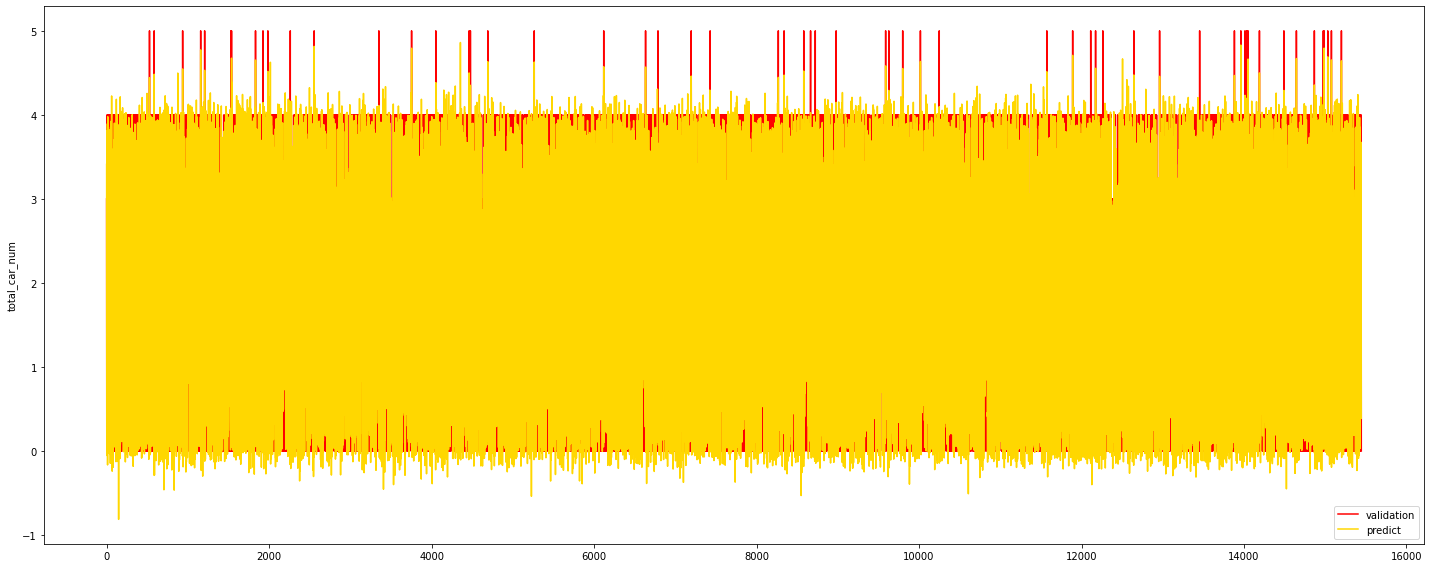

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

plt.plot(y_valid, color='red' , label='validation')
plt.plot(y_pred, color='gold' , label='predict')
plt.ylabel('total_car_num')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
score = model_adaboostgru.score(X_valid_t, y_valid)
print(score)

483/483 [==============================] - 4s 8ms/step
0.7267820752592535


#### 3. Dropout
train 동안 네트워크 일부 생략, epoch마다 drop되는 node 무작위
- model.add(layers.Dropout(0.5))

In [ ]:
import tensorflow as tf
#from keras import models, layers
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras import regularizers

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(layers.Dropout(0.5))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=65, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/65


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 49s 24ms/step - loss: 2.2003 - mean_squared_error: 2.2003
Epoch 2/65
1931/1931 [==============================] - 46s 24ms/step - loss: 2.0100 - mean_squared_error: 2.0100
Epoch 3/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.9328 - mean_squared_error: 1.9328
Epoch 4/65
1931/1931 [==============================] - 47s 25ms/step - loss: 1.8270 - mean_squared_error: 1.8270
Epoch 5/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.7267 - mean_squared_error: 1.7267
Epoch 6/65
1931/1931 [==============================] - 48s 25ms/step - loss: 1.6292 - mean_squared_error: 1.6292
Epoch 7/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.5460 - mean_squared_error: 1.5460
Epoch 8/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.4690 - mean_squared_error: 1.4690
Epoch 9/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.3940 - mean_squared

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7ffad1f5e5f0>, epochs=65),
                  n_estimators=1, random_state=42)

In [ ]:
y_pred = model_adaboostgru.predict(X_valid_t)

483/483 [==============================] - 6s 12ms/step


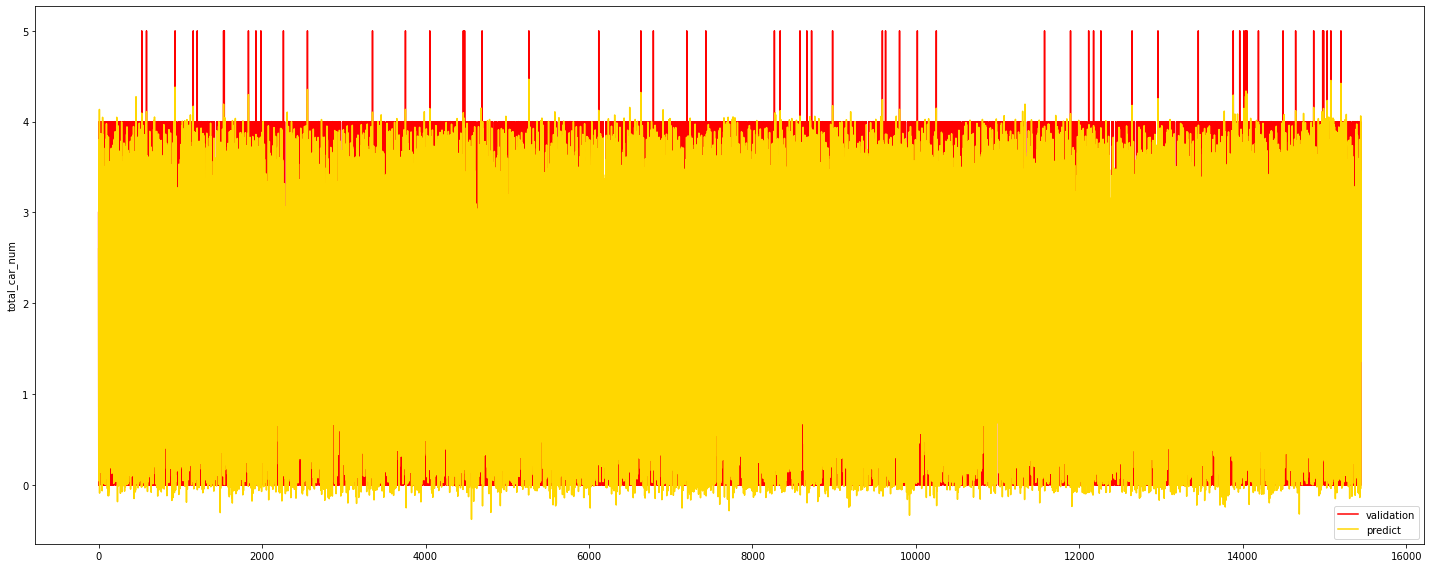

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

plt.plot(y_valid, color='red' , label='validation')
plt.plot(y_pred, color='gold' , label='predict')
plt.ylabel('total_car_num')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
score = model_adaboostgru.score(X_valid_t, y_valid)
print(score)

483/483 [==============================] - 4s 8ms/step
0.7320248934273688


#Result-Loss

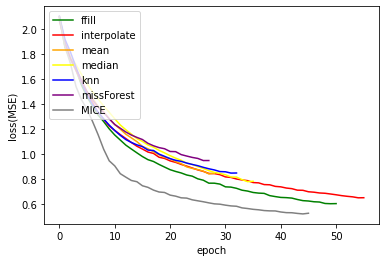

In [ ]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist_ffill.history['loss'],'y',label='ffill', color='green')
loss_ax.plot(hist_interpolate.history['loss'],'y',label='interpolate', color='red')
loss_ax.plot(hist_mean.history['loss'],'y',label='mean', color='orange')
loss_ax.plot(hist_median.history['loss'],'y',label='median', color='yellow')
loss_ax.plot(hist_knn.history['loss'],'y',label='knn', color='blue')
loss_ax.plot(hist_missForest.history['loss'],'y',label='missForest', color='purple')
loss_ax.plot(hist_mice.history['loss'],'y',label='MICE', color='gray')

loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')


plt.show()

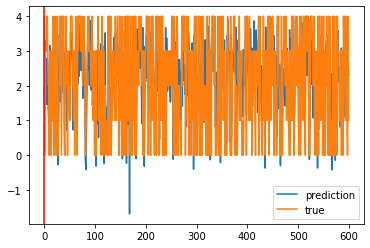

In [ ]:
preds = model.predict(X_test_t)

plt.plot(preds[:600], label='prediction')
plt.plot(y_test[:600], label='true')
plt.axvline(x=len(y_test)-len(preds), color='r')
plt.legend()
plt.show()